# Problem statement

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you may expect — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighborhood and based on gathered data you will try to assess your house price.

# Objective

Create a model that, if the necessary features are added, would forecast the price of a house. Therefore, we will identify the key characteristics from the provided features dataset that have the greatest impact on the price of a house and Create the most accurate model possible to forecast home prices.

# Business Reason

Since most people are unaware of the characteristics that influence the price of a property, we can offer them HouseBuyingSelling guiding services in the area to help them buy or sell a property at the best possible price and avoid losing their hard-earned money by listing it at a low price or waiting for a buyer by listing it at a high price.

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  GridSearchCV

# DATA LOADING

***We have preprocessed the data and added new columns As Explined below
<br/> #1 we have added Year, Month, Day by manupulating cid column
<br/> #2 we have added age_of_the_property column by manupulating yr_built column
<br/> #3 we have State and City by mapping with zipcode column <br/> Now we are using the preprocessed CSV file for futhur analysis***

First, we will load the data from the given csv(comma seperated values) file provided as part of the Capstone Project.

In [2]:
df = pd.read_csv(r"innercity.csv")

In [3]:
# let's check whether data loaded successfully or not, by checking first few records
df.head()

,cid,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,...,yr_built,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
0,3876100940,2015,4,27,600000,4.0,1.75,3050.0,9440.0,1.0,...,1966.0,49,0,98034,Washington,Kirkland,2020.0,8660.0,0.0,12490.0
1,3145600250,2015,3,17,190000,2.0,1.00,670.0,3101.0,1.0,...,1948.0,67,0,98118,Washington,Seattle,1660.0,4100.0,0.0,3771.0
2,7129303070,2014,8,20,735000,4.0,2.75,3040.0,2415.0,2.0,...,1966.0,48,0,98118,Washington,Seattle,2620.0,2433.0,0.0,5455.0
3,7338220280,2014,10,10,257000,3.0,2.50,1740.0,3721.0,2.0,...,2009.0,5,0,98002,Washington,Auburn,2030.0,3794.0,0.0,5461.0
4,7950300670,2015,2,18,450000,2.0,1.00,1120.0,4590.0,1.0,...,1924.0,91,0,98118,Washington,Seattle,1120.0,5100.0,0.0,5710.0


### *Data is loaded successfully as we can see first 5 records from the dataset.*

# Data Understanding and Data Preprocessing

After loading data into our pandas library dataframe, we can now try to understand the kind of data we have with us.

In [4]:
# prints shape of the dataframe
df.shape

(21613, 26)

### *We have more than 21k records having 26 features*

In [5]:
# let's check out the columns/features we have in the dataset

df.columns

Index(['cid', 'Year', 'Month', 'Day', 'price', 'room_bed', 'room_bath',
       'living_measure', 'lot_measure', 'ceil', 'coast', 'sight', 'condition',
       'quality', 'ceil_measure', 'basement', 'yr_built',
       'age_of_the_property', 'no_of_year_renovted', 'zipcode', 'State',
       'City', 'living_measure15', 'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

 *From the above we can see the different columns we have in dataset.*

*These columns provide below information*

 **cid** : Notation for a house. Will not of our use, So we will drop this column

**dayhours**: Represents Date, when house was sold 

**price**: It's our TARGET feature, that we have to predict based on other featues

**room_bed**: Represents number of bedrooms in a house

**room_bath**: Represents number of bathrooms

**living_measure**: Represents square footage of house

**lot_measure**: Represents square footage of lot

**ceil**: Represents number of floors in house

**coast**: Represents whether house has waterfront view

**sight**: Represents how many times sight has been viewed

**condition**: Represents the overall condition of the house

**quality**: Represents grade given to the house based on grading system

**ceil_measure**: Represents square footage of house apart from basement

**basement**: Represents square footage of basement

**yr_built**: Represents the year when house was built

**yr_renovated**: Represents the year when house was last renovated

**zipcode**: Represents zipcode as name implies

**State**:Represents States

**City**:represents cities

**lat**: Represents Lattitude co-ordniates

**long**: Represents Longitude co-ordinates

**living_measure15**: Represents square footage of house, when measured in 2015 year as house area may or may not changed after renovation if any happened

**lot_measure15**: Represents square footage of lot, when measured in 2015 year as lot area may or may not change after renovation if any done

**furnished**: Tells whether house is furnished or not

**total_area**: Represents total area i.e. area of both living and lot

In [6]:
# let's see the data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cid                  21613 non-null  int64  
 1   Year                 21613 non-null  int64  
 2   Month                21613 non-null  int64  
 3   Day                  21613 non-null  int64  
 4   price                21613 non-null  int64  
 5   room_bed             21505 non-null  float64
 6   room_bath            21505 non-null  float64
 7   living_measure       21596 non-null  float64
 8   lot_measure          21571 non-null  float64
 9   ceil                 21541 non-null  float64
 10  coast                21582 non-null  float64
 11  sight                21556 non-null  float64
 12  condition            21528 non-null  float64
 13  quality              21612 non-null  float64
 14  ceil_measure         21612 non-null  float64
 15  basement             21612 non-null 

In the dataset, we have more than 21k records and 26 columns, out of which

16 features are of float type

8 features are of integer type

2 feature is of object type

In [7]:
# let's check whether our dataset have any null/missing values
df.isnull().sum()

cid                      0
Year                     0
Month                    0
Day                      0
price                    0
room_bed               108
room_bath              108
living_measure          17
lot_measure             42
ceil                    72
coast                   31
sight                   57
condition               85
quality                  1
ceil_measure             1
basement                 1
yr_built                15
age_of_the_property      0
no_of_year_renovted      0
zipcode                  0
State                    0
City                     0
living_measure15       166
lot_measure15           29
furnished               29
total_area              68
dtype: int64

**We have some null or missing values for some of the columns**

In [8]:
# let's check whether there's any duplicate record in our dataset or not. If present, we have to remove them
df.duplicated().sum()

0

**We don't have any duplicate record in out dataset, So we can say we have more than 21k Unique records**

**As House ID/Property ID.Not used for analysis and Instead of yr_built  we have age_of_the_property so we can drop both cid and Yr_built**

In [9]:
#droping unnecessary columns
col_to_drop=['yr_built','cid'] 

In [10]:
df = df.drop(columns=col_to_drop,axis=1)

**we have successfully dropped cid and yr_built**

# **Handling Missing values**

**Handling Missing values in room_bed column**

In [11]:
mean_value = df['room_bed'].mean()

# Replace blank values with the mean
df['room_bed'].fillna(mean_value, inplace=True)

df['room_bed']=df['room_bed'].round().astype('int64')

In [12]:
df['room_bed'].isnull().sum()

0

**Finding mean for Room bed and filling nan values by mean and rounding off to nearest integer and converting them to int**

**Handling Missing values in room_bath column**

In [13]:
mean_value = df['room_bath'].mean()

# Replace blank values with the mean
df['room_bath'].fillna(mean_value, inplace=True)

df['room_bath']=df['room_bath'].round().astype('int64')

In [14]:
df['room_bath'].isnull().sum()

0

**Finding mean for Room bath and filling nan values by mean and rounding off to nearest integer and converting them to int**

**Handling Missing values in living_measure column**

In [15]:
median_value = df['living_measure'].median()

# Replace blank values with the median
df['living_measure'].fillna(median_value, inplace=True)

df['living_measure']=df['living_measure'].round().astype('int64')

In [16]:
df['living_measure'].isnull().sum()

0

**Finding median for living measure and filling nan values by mean and rounding off to nearest integer and converting them to int**

**Handling Missing values in lot_measure column**

In [17]:
median_value = df['lot_measure'].median()

# Replace blank values with the median
df['lot_measure'].fillna(median_value, inplace=True)

df['lot_measure']=df['lot_measure'].round().astype('int64')

In [18]:
df['lot_measure'].isnull().sum()

0

**Finding median for lot measure and filling nan values by mean and rounding off to nearest integer and converting them to int**

**Handling Missing values in ceil column**

In [19]:
mean_value=df['ceil'].mean()
df['ceil'].fillna(mean_value, inplace=True)
df['ceil']=df['ceil'].round().astype('int64')

In [20]:
df['ceil'].isnull().sum()

0

**Finding mean for ceil and filling nan values by mean and rounding off to nearest integer and converting them to int**

**Handling Missing values in coast column**

In [21]:
mode_value = df['coast'].mode()


df['coast'].fillna(0, inplace=True)
df['coast']=df['coast'].astype('int64')

In [22]:
df['coast'].isnull().sum()

0

**Finding mean for coast and filling nan values by mean and rounding off to nearest integer and converting them to int**

**Handling Missing values in sight column**

In [23]:
df['sight']=df['sight'].fillna(0)
df['sight']=df['sight'].astype('int64')

In [24]:
df['sight'].isnull().sum()

0

**as sight represents how many times sight has been viewed. we are replaceing null with 0**

**Handling Missing values in condition column**

In [25]:
df['condition']=df['condition'].fillna(df['condition'].median())
df['condition']=df['condition'].astype('int64')

In [26]:
df['condition'].isnull().sum()

0

**Finding median for condition and filling nan values by median and rounding off to nearest integer and converting them to int**

**Handling Missing values in quality column**

In [27]:
df['quality'] = df['quality'].fillna(df['quality'].median())
df['quality']=df['quality'].astype('int64')

In [28]:
df['quality'].isnull().sum()

0

**Finding median for quality and filling nan values by median and rounding off to nearest integer and converting them to int**

**Handling Missing values in ceil_measure column**

In [29]:
df['ceil_measure']=df['ceil_measure'].fillna(df['ceil_measure'].median())
df['ceil_measure']=df['ceil_measure'].astype('int64')

In [30]:
df['ceil_measure'].isnull().sum()

0

**Finding median for ceil measure and filling nan values by median and rounding off to nearest integer and converting them to int**

**Handling Missing values in basement column**

In [31]:
df['basement']=df['basement'].fillna(df['basement'].median())
df['basement']=df['basement'].round().astype('int64')

In [32]:
df['basement'].isnull().sum()

0

**Finding median for ceil basement and filling nan values by median and rounding off to nearest integer and converting them to int**

**Handling Missing values in age_of_the_property column**

In [33]:
df['age_of_the_property']=df['age_of_the_property'].fillna(0)
df['age_of_the_property']=df['age_of_the_property'].astype('int64')

In [34]:
df['age_of_the_property'].isnull().sum()

0

**filling nan with 0 is better instead of mean or median**

In [35]:
df['age_of_the_property'].unique()

array([  49,   67,   48,    5,   91,   20,    9,   36,   31,    2,  103,
         24,   96,   90,  106,   47,   64,   15,   71,   92,   37,   10,
         79,   51,   70,   27,    7,   74,   11,   26,   29,   16,   19,
         69,    3,   56,   72,    0,   44,   78,   60,   12,   43,    8,
         84,   50,   52,   61,   21,   17,   65,    6,   35,   18,   42,
         22,    1,   46,   34,   33,   45,   13,   86,   62,   99,   39,
         41,   94,   83,   40,   54,  114,   28, 2015,   85,   66,   38,
         63,  109,   59,   14,   73,   30,   89,   68,   23,   87,   53,
         58,   82,   97,   55,   88,  115,  108,  101,   57,   93,  100,
         76,  104,   77,   25,   98,  113,  107,   32,   80,  110,  102,
        105,   75,    4,   95,   81,  112,  111, 2014,   -1], dtype=int64)

In [36]:
df['age_of_the_property']=df['age_of_the_property'].replace([2015,2014,-1],[0,0,0])

In [37]:
df['age_of_the_property'].unique()

array([ 49,  67,  48,   5,  91,  20,   9,  36,  31,   2, 103,  24,  96,
        90, 106,  47,  64,  15,  71,  92,  37,  10,  79,  51,  70,  27,
         7,  74,  11,  26,  29,  16,  19,  69,   3,  56,  72,   0,  44,
        78,  60,  12,  43,   8,  84,  50,  52,  61,  21,  17,  65,   6,
        35,  18,  42,  22,   1,  46,  34,  33,  45,  13,  86,  62,  99,
        39,  41,  94,  83,  40,  54, 114,  28,  85,  66,  38,  63, 109,
        59,  14,  73,  30,  89,  68,  23,  87,  53,  58,  82,  97,  55,
        88, 115, 108, 101,  57,  93, 100,  76, 104,  77,  25,  98, 113,
       107,  32,  80, 110, 102, 105,  75,   4,  95,  81, 112, 111],
      dtype=int64)

**replaced values like 2014 , 2015 , -1 by 0**

In [38]:
df['no_of_year_renovted']=df['no_of_year_renovted'].fillna(0)

In [39]:
df['no_of_year_renovted'].unique()

array([ 0, 21, 31,  1, 22, 15,  3, 20,  5, 70, 43, 12, 59, 29,  6,  9, 36,
       16, 46,  4, 25, 27, 18, 74, 28, 30, 26, 19, 11, 14,  8, 45, -1, 10,
        2, 13, 24, 56, 47, 23, 44, 32, 64, 54, 58, 17, 34,  7, 55, 35, 40,
       41, 39, 33, 51, 38, 66, 69, 37, 42, 49, 50, 61, 52, 65, 48, 57, 68,
       53, 80, 60], dtype=int64)

In [40]:
df['no_of_year_renovted']=df['no_of_year_renovted'].replace([-1],0)

In [41]:
df['no_of_year_renovted'].unique()

array([ 0, 21, 31,  1, 22, 15,  3, 20,  5, 70, 43, 12, 59, 29,  6,  9, 36,
       16, 46,  4, 25, 27, 18, 74, 28, 30, 26, 19, 11, 14,  8, 45, 10,  2,
       13, 24, 56, 47, 23, 44, 32, 64, 54, 58, 17, 34,  7, 55, 35, 40, 41,
       39, 33, 51, 38, 66, 69, 37, 42, 49, 50, 61, 52, 65, 48, 57, 68, 53,
       80, 60], dtype=int64)

**Filling nan values by 0 and replace a negative 1 by 0**

**Handling Missing values in living_measure15 column**

In [42]:
df['living_measure15']=df['living_measure15'].fillna(df['living_measure15'].median())
df['living_measure15']=df['living_measure15'].astype('int64')

In [43]:
df['living_measure15'].isnull().sum()

0

**Finding median for living_measure15 and filling nan values by median and rounding off to nearest integer and converting them to int**

**Handling Missing values in lot_measure15 column**

In [44]:
df['lot_measure15']=df['lot_measure15'].fillna(df['lot_measure15'].median())
df['lot_measure15']=df['lot_measure15'].astype('int64')

In [45]:
df['lot_measure15'].isnull().sum()

0

**Finding median for lot measure15 and filling nan values by median and rounding off to nearest integer and converting them to int**

**Handling Missing values in furnished column**

In [46]:
df['furnished']=df['furnished'].fillna(0)
df['furnished']=df['furnished'].astype('int64')

In [47]:
df['furnished'].isnull().sum()

0

**as furniturevalue is either 0 or 1 so replacing it with 0**

**Handling Missing values in total_area column**

In [48]:
df['total_area']=df['total_area'].fillna(df['total_area'].median())
df['total_area']=df['total_area'].astype('int64')

In [49]:
df['total_area'].isnull().sum()

0

**Finding median for total area and filling nan values by median and rounding off to nearest integer and converting them to int**

In [50]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
price                  0
room_bed               0
room_bath              0
living_measure         0
lot_measure            0
ceil                   0
coast                  0
sight                  0
condition              0
quality                0
ceil_measure           0
basement               0
age_of_the_property    0
no_of_year_renovted    0
zipcode                0
State                  0
City                   0
living_measure15       0
lot_measure15          0
furnished              0
total_area             0
dtype: int64

## Exploratory Data Analysis

Let's do some visual data analysis of the features

In [ ]:
#profiling for more insights & complete overview

profile=ProfileReport(df,explorative=True,dark_mode=True)


In [ ]:
profile.to_notebook_iframe()

### Analyzing Feature: Price (our Target)

In [51]:
df.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

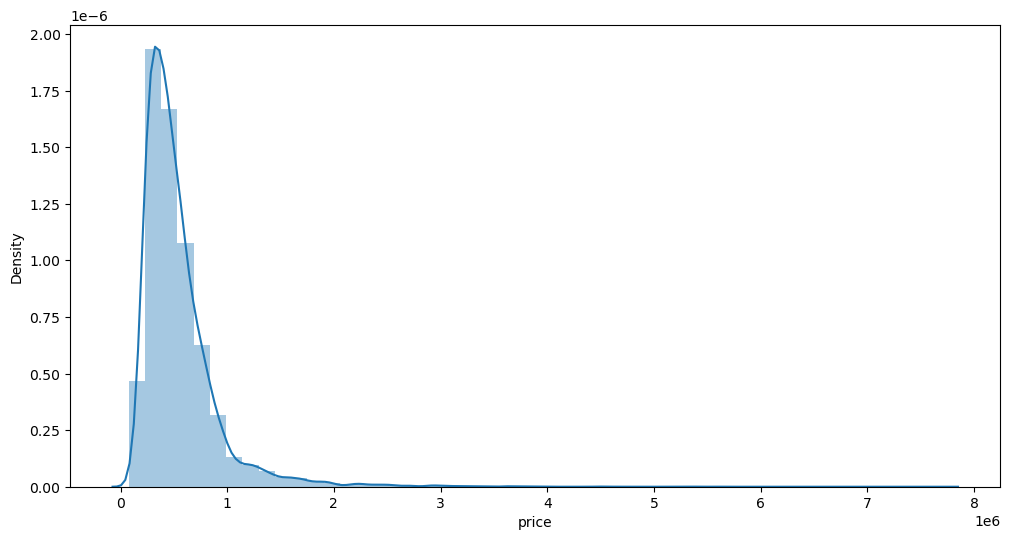

In [52]:
plotSizeX = 12
plotSizeY = 6
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.distplot(df['price'])

**The Price is leading to almost 8le6 and distribution is right-skewed.**

### Analyzing Feature: room_bed

In [53]:
df['room_bed'].value_counts()

3     9875
4     6854
2     2747
5     1595
6      270
1      197
7       38
8       13
0       13
9        6
10       3
33       1
11       1
Name: room_bed, dtype: int64

**The value of 33 seems to be outlier we need to check the data point before imputing the same**

In [54]:
df[df['room_bed']==33]

,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
16913,2014,6,25,640000,33,2,1620,6000,1,0,...,580,67,0,98103,Washington,Seattle,1330,4700,0,7620


**We can delete this data point after bivariate analysis as it looks like an outlier because it has low price for 33 bed room property**

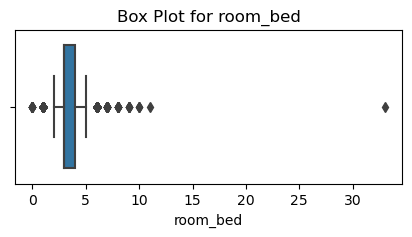

In [55]:
plt.figure(figsize=(5, 2))  # Adjust the figure size if needed
sns.boxplot(df['room_bed'])

plt.xlabel('room_bed')
plt.title('Box Plot for room_bed')
plt.show()

<AxesSubplot:xlabel='room_bed', ylabel='count'>

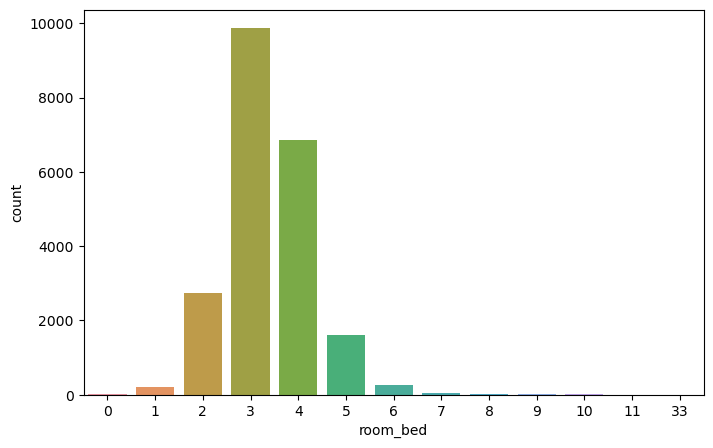

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(df.room_bed)

**Most of the houses have 3 or 4 bedrooms**

### Analyzing Feature: room_bath

In [57]:
df['room_bath'].value_counts().sort_index()

0       14
1     3910
2    13892
3     2516
4     1194
5       57
6       24
7        2
8        4
Name: room_bath, dtype: int64

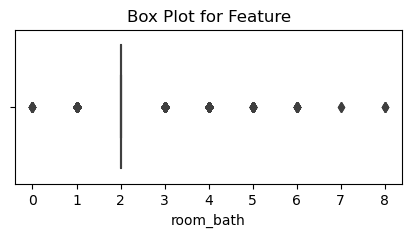

In [58]:
plt.figure(figsize=(5, 2))  # Adjust the figure size if needed
sns.boxplot(df['room_bath'])  # 'vert=False' for horizontal box plot


plt.xlabel('room_bath')
plt.title('Box Plot for Feature')
plt.show()

<AxesSubplot:xlabel='room_bath', ylabel='count'>

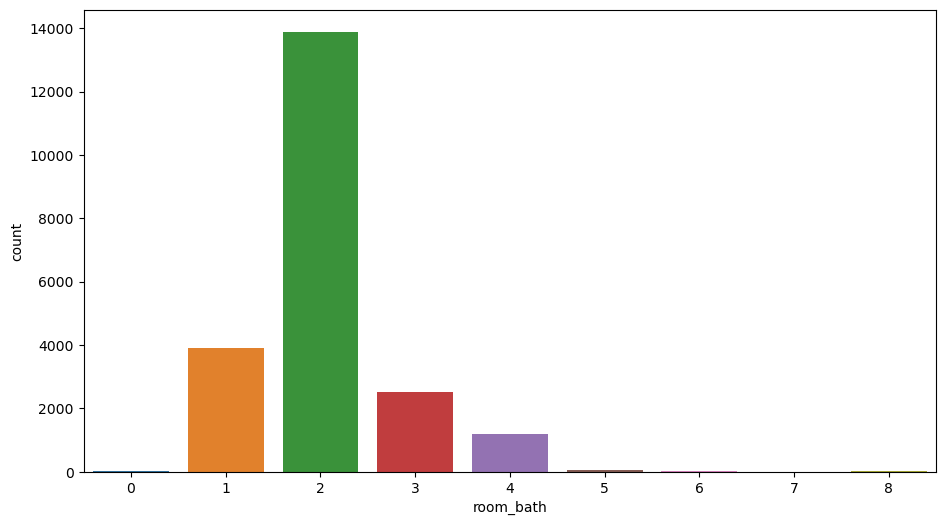

In [59]:
plt.figure(figsize=(11,6))
sns.countplot(df.room_bath)

**Majority of the properties have bathroom in the range of 1 to 3 and we can also round off the values to nearest integer**

### Analyzing Feature: Living measure

count    21613.000000
mean      2079.727155
std        918.147155
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

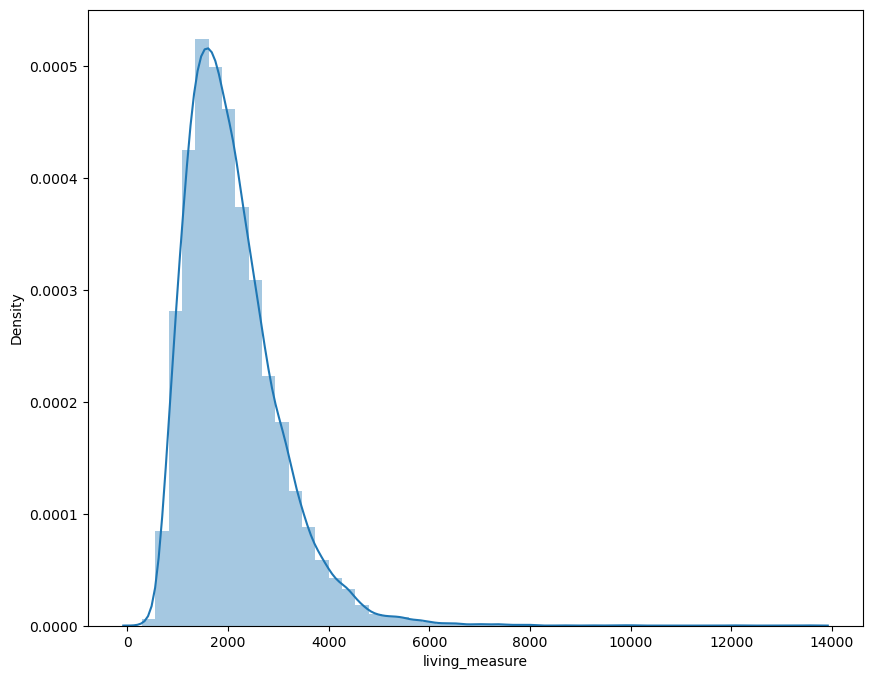

In [60]:
plt.figure(figsize=(10, 8))
sns.distplot(df.living_measure)
df.living_measure.describe()

**Distribution tells us, living_measure is right-skewed.**

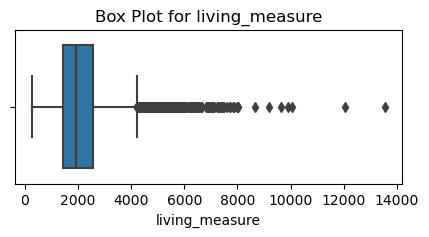

In [61]:
plt.figure(figsize=(5, 2))  # Adjust the figure size if needed
sns.boxplot(df['living_measure']) 


plt.xlabel('living_measure')
plt.title('Box Plot for living_measure')
plt.show()

**There are many outliers in living measure. Need to review further to treat the same.**

### Analyzing Feature: lot_measure

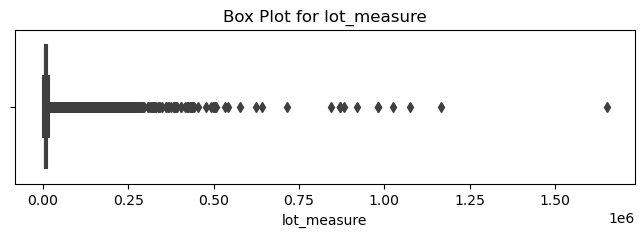

In [62]:
plt.figure(figsize=(8, 2))  # Adjust the figure size if needed
sns.boxplot(df['lot_measure']) 


plt.xlabel('lot_measure')
plt.title('Box Plot for lot_measure')
plt.show()

**There are many outliers in lot_measure. Need to review further to treat the same.**

### Analyzing Feature: ceil

In [63]:
#let's see the ceil count for all the records
df.ceil.value_counts()

1    10719
2    10276
3      610
4        8
Name: ceil, dtype: int64

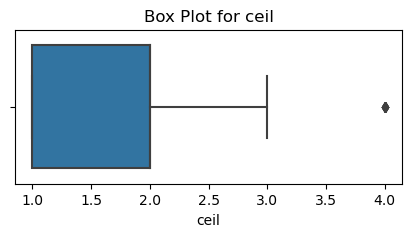

In [64]:
plt.figure(figsize=(5, 2))  # Adjust the figure size if needed
sns.boxplot(df['ceil'])


plt.xlabel('ceil')
plt.title('Box Plot for ceil')
plt.show()

**we can see there is one outliers and can analyse about same later**

<AxesSubplot:xlabel='ceil', ylabel='count'>

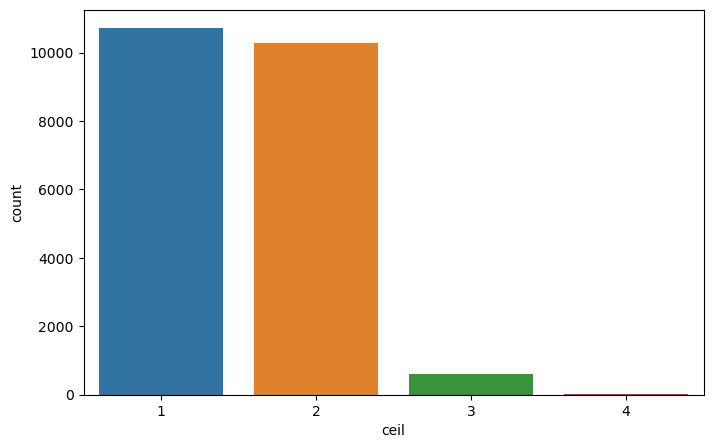

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot('ceil',data=df)

**We can see, most houses have 1 or 2  floor**

### Analyzing Feature: coast

In [66]:
df.coast.value_counts()

0    21452
1      161
Name: coast, dtype: int64

<AxesSubplot:xlabel='coast', ylabel='count'>

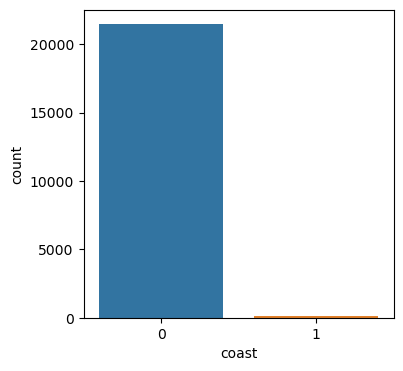

In [67]:
plt.figure(figsize=(4,4))
sns.countplot('coast',data=df)

**we can say most houses do not have waterfront view, very few have waterfront view**

### Analyzing Feature: sight

In [68]:
df.sight.value_counts()

0    19494
2      959
3      510
1      332
4      318
Name: sight, dtype: int64

<AxesSubplot:xlabel='sight', ylabel='count'>

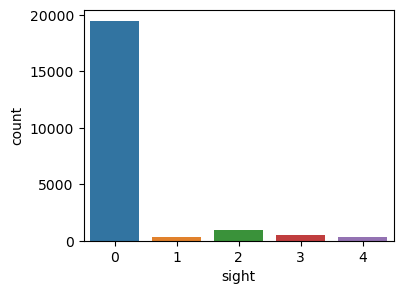

In [69]:
plt.figure(figsize=(4,3))
sns.countplot('sight',data=df)

**we can see most sights have not been viewed**

### Analyzing Feature: condition

In [70]:
df.condition.value_counts()

3    14063
4     5655
5     1694
2      171
1       30
Name: condition, dtype: int64

<AxesSubplot:xlabel='condition', ylabel='count'>

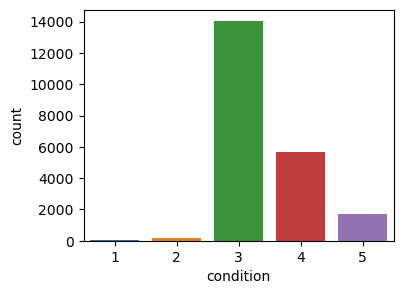

In [71]:
plt.figure(figsize=(4,3))
sns.countplot('condition',data=df)

**Overall most houses are rated as 3**

### Analyzing Feature: quality

In [72]:
df.quality.value_counts()

7     8982
8     6067
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

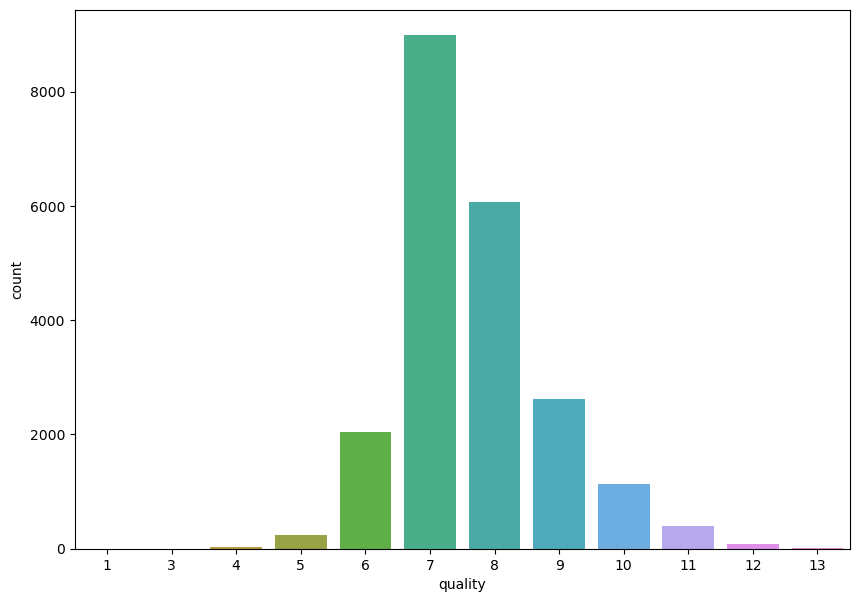

In [73]:
df.quality.value_counts()
plt.figure(figsize=(10, 7))
sns.countplot('quality',data=df)

**most houses have quality rating between 6 to 10**

### Analyzing Feature: ceil_measure

count    21613.000000
mean      1788.355989
std        828.084833
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

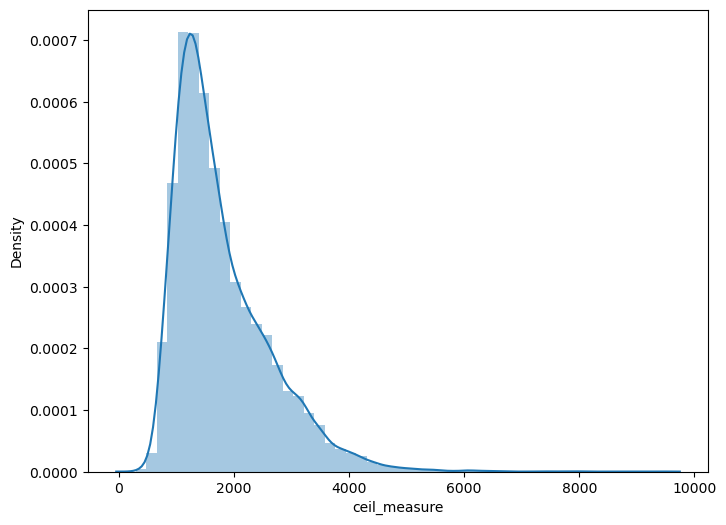

In [74]:
plt.figure(figsize=(8, 6))
sns.distplot(df.ceil_measure)
df.ceil_measure.describe()

**ceil_measure is right skewed**

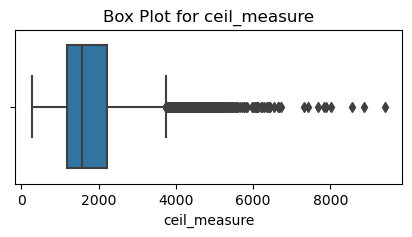

In [75]:
plt.figure(figsize=(5, 2))  # Adjust the figure size if needed
sns.boxplot(df['ceil_measure'])


plt.xlabel('ceil_measure')
plt.title('Box Plot for ceil_measure')
plt.show()

**There are many outliers in ceil_measure. Need to review further to treat the same.**

### Analyzing Feature: basement

<AxesSubplot:xlabel='basement', ylabel='Density'>

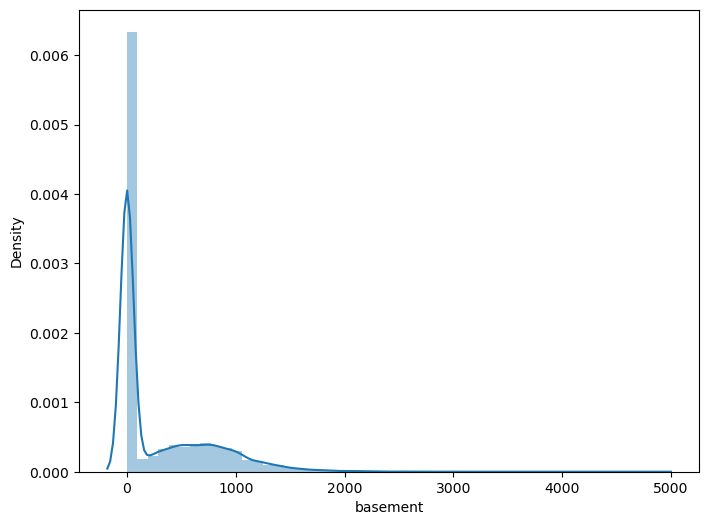

In [76]:
plt.figure(figsize=(8, 6))
sns.distplot(df.basement)

**There are 2 gaussians, which simply means that there are houses which doesn't have basements and some have the basements**

In [77]:
df[df.basement==0].shape

(13126, 24)

**we can see that there are 13k houses with no basements**

<AxesSubplot:xlabel='basement'>

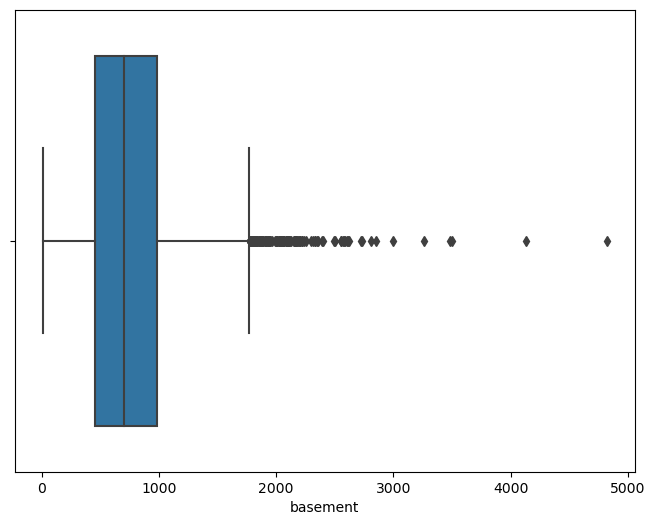

In [78]:
df_base=df[df['basement']>0]
plt.figure(figsize=(8,6))
sns.boxplot(df_base['basement'])

**There are houses without basements so they do not have to included so ploting boxplot for properties which have basements only and claerly outliers are visible so need to review further to treat the same**

<AxesSubplot:xlabel='basement', ylabel='Density'>

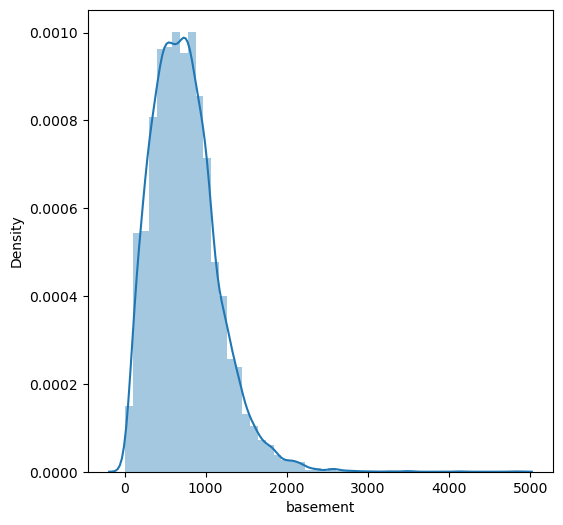

In [79]:
#Distribution of houses having basement
plt.figure(figsize=(6,6))
sns.distplot(df_base.basement)

**Distribution with basement is right skewed**

### Analyzing Feature: age_of_the_property

In [80]:
df['age_of_the_property'].unique()

array([ 49,  67,  48,   5,  91,  20,   9,  36,  31,   2, 103,  24,  96,
        90, 106,  47,  64,  15,  71,  92,  37,  10,  79,  51,  70,  27,
         7,  74,  11,  26,  29,  16,  19,  69,   3,  56,  72,   0,  44,
        78,  60,  12,  43,   8,  84,  50,  52,  61,  21,  17,  65,   6,
        35,  18,  42,  22,   1,  46,  34,  33,  45,  13,  86,  62,  99,
        39,  41,  94,  83,  40,  54, 114,  28,  85,  66,  38,  63, 109,
        59,  14,  73,  30,  89,  68,  23,  87,  53,  58,  82,  97,  55,
        88, 115, 108, 101,  57,  93, 100,  76, 104,  77,  25,  98, 113,
       107,  32,  80, 110, 102, 105,  75,   4,  95,  81, 112, 111],
      dtype=int64)

<AxesSubplot:xlabel='age_of_the_property', ylabel='Density'>

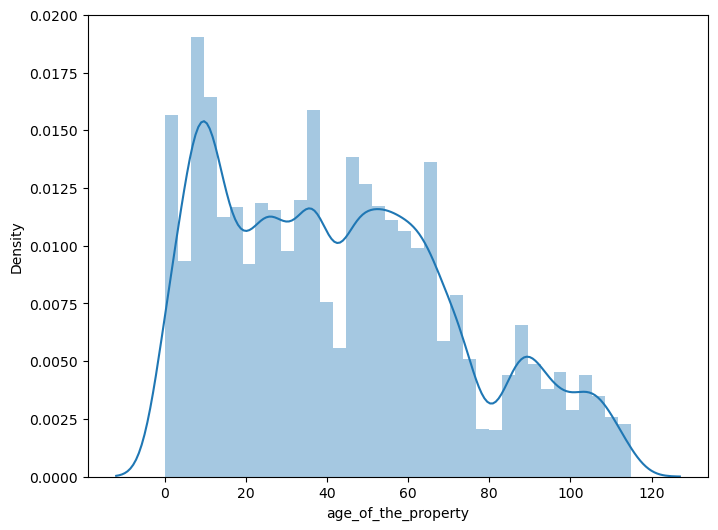

In [81]:
plt.figure(figsize=(8,6))
sns.distplot(df.age_of_the_property)

<AxesSubplot:xlabel='age_of_the_property'>

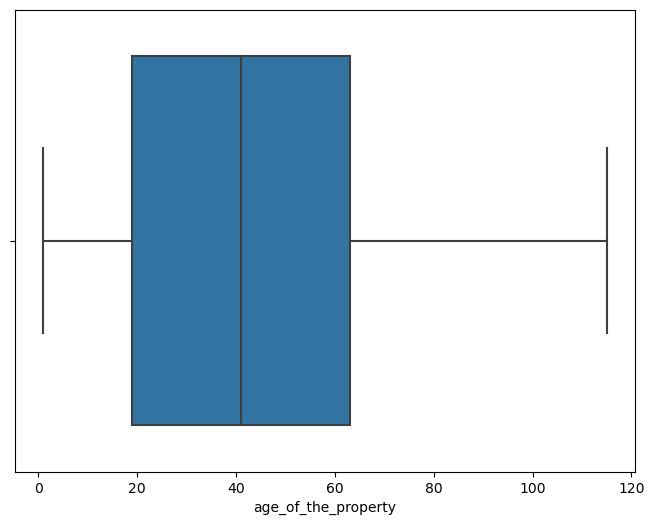

In [82]:
df_base=df[df['age_of_the_property']>0]
plt.figure(figsize=(8,6))
sns.boxplot(df_base['age_of_the_property'])

**Distribution says it's right skewed and box plot says that there are no outliers**

### Analyzing Feature: no_of_year_renovted

In [83]:
df['no_of_year_renovted'].value_counts()

0     20791
1        45
8        37
11       34
10       31
      ...  
48        1
68        1
53        1
80        1
60        1
Name: no_of_year_renovted, Length: 70, dtype: int64

**we can clearly see that most of the houses are not renovated**

<AxesSubplot:xlabel='no_of_year_renovted', ylabel='Density'>

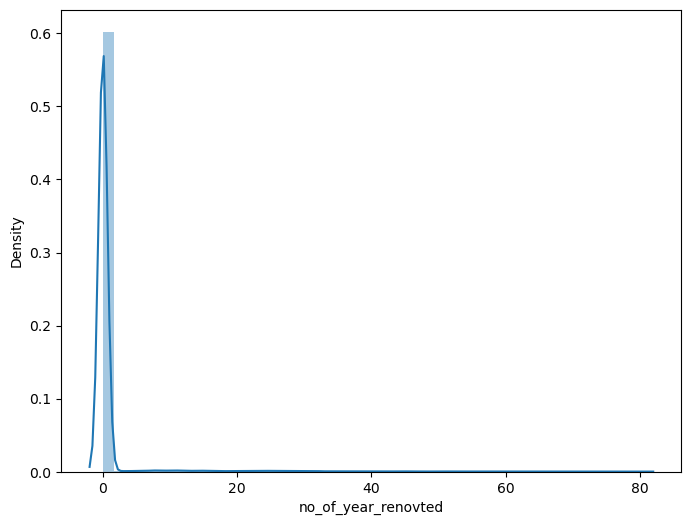

In [84]:
plt.figure(figsize=(8, 6))
sns.distplot(df.no_of_year_renovted)

**Distribution for all the no_of_year_renovted values**

<AxesSubplot:xlabel='no_of_year_renovted', ylabel='Density'>

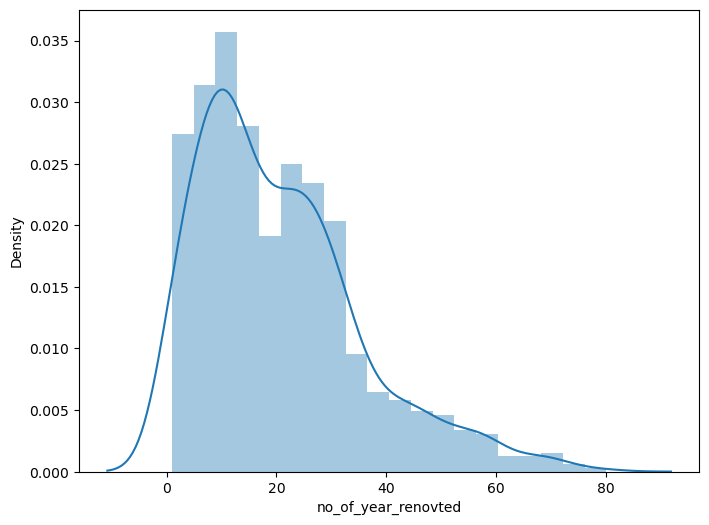

In [85]:
df_nyr=df[df['no_of_year_renovted']>0]
plt.figure(figsize=(8,6))
sns.distplot(df_nyr['no_of_year_renovted'])

**we can clearly say no_of_year_renovted values greater than 0 distribution has right skewed**

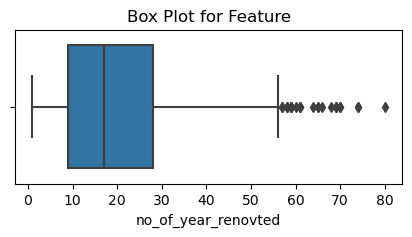

In [86]:
plt.figure(figsize=(5, 2))  # Adjust the figure size if needed
sns.boxplot(df_nyr['no_of_year_renovted'])


plt.xlabel('no_of_year_renovted')
plt.title('Box Plot for Feature')
plt.show()

**Box plot for no_of_year_renovted greater than 0 also has some outliers which will be taken care**

In [87]:
#let's see the columns of dataframe once again
df.columns

Index(['Year', 'Month', 'Day', 'price', 'room_bed', 'room_bath',
       'living_measure', 'lot_measure', 'ceil', 'coast', 'sight', 'condition',
       'quality', 'ceil_measure', 'basement', 'age_of_the_property',
       'no_of_year_renovted', 'zipcode', 'State', 'City', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

### Analyzing Feature: living_measure15

<AxesSubplot:xlabel='living_measure15', ylabel='Density'>

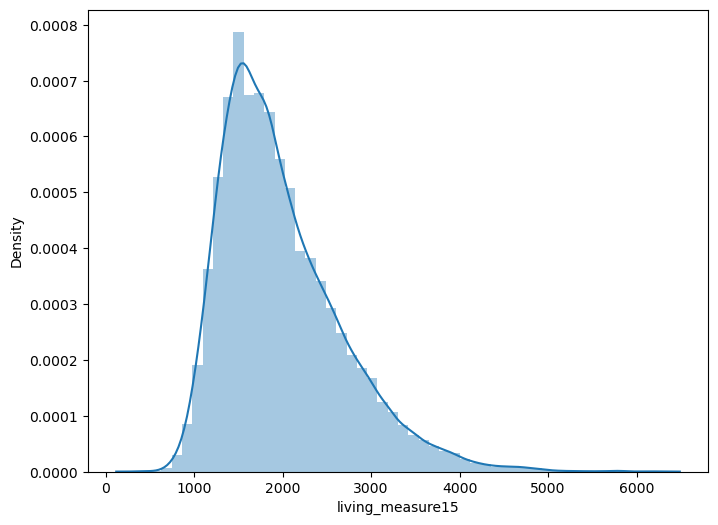

In [88]:
plt.figure(figsize=(8,6))
sns.distplot(df['living_measure15'])

**Distribution is Right skewed**

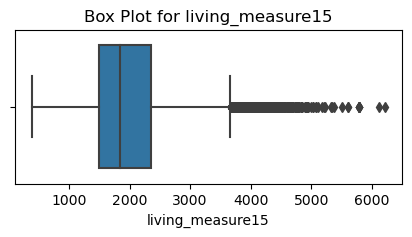

In [89]:
plt.figure(figsize=(5, 2))  # Adjust the figure size if needed
sns.boxplot(df['living_measure15'])


plt.xlabel('living_measure15')
plt.title('Box Plot for living_measure15')
plt.show()

**There are many outliers in living measure15. Need to review further to treat the same.**

### Analyzing Feature: lot_measure15

<AxesSubplot:xlabel='lot_measure15', ylabel='Density'>

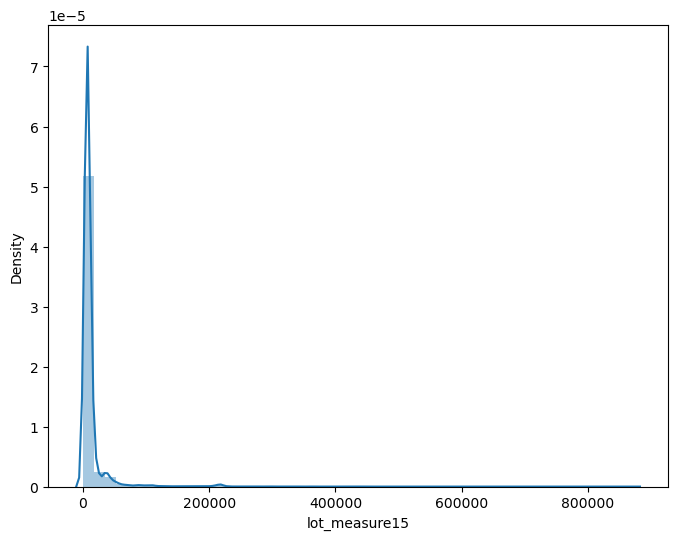

In [90]:
plt.figure(figsize=(8,6))
sns.distplot(df['lot_measure15'])

**Distributuon is highly Right skewed**

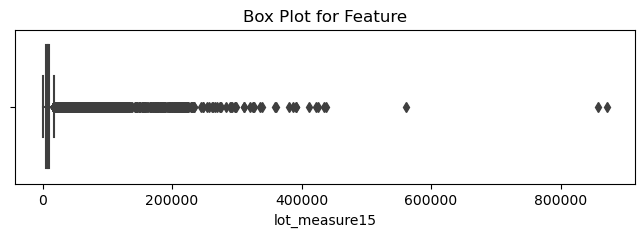

In [91]:
plt.figure(figsize=(8, 2))  # Adjust the figure size if needed
sns.boxplot(df['lot_measure15'])


plt.xlabel('lot_measure15')
plt.title('Box Plot for Feature')
plt.show()

**There are many outliers in lot measure15. Need to review further to treat the same.**

### Analyzing Feature: furnished

In [92]:
df.furnished.value_counts()

0    17367
1     4246
Name: furnished, dtype: int64

<AxesSubplot:xlabel='furnished', ylabel='count'>

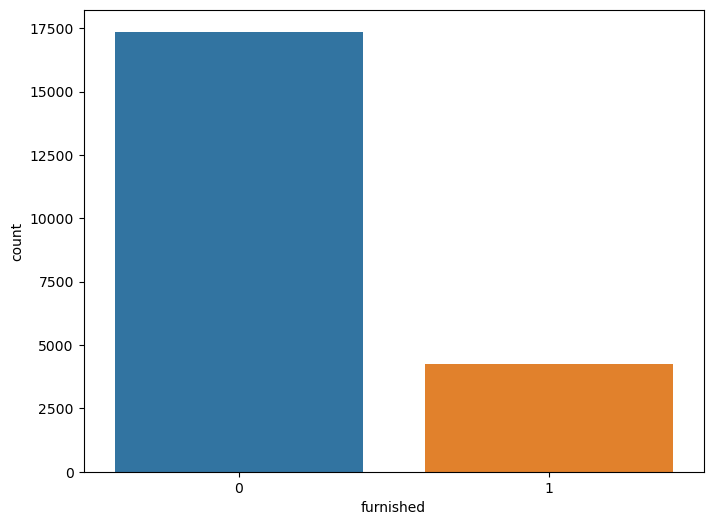

In [93]:
plt.figure(figsize=(8, 6))
sns.countplot('furnished',data=df)

**Most properties are not furnished.** 

### Analyzing Feature: total_area

<AxesSubplot:xlabel='total_area', ylabel='Density'>

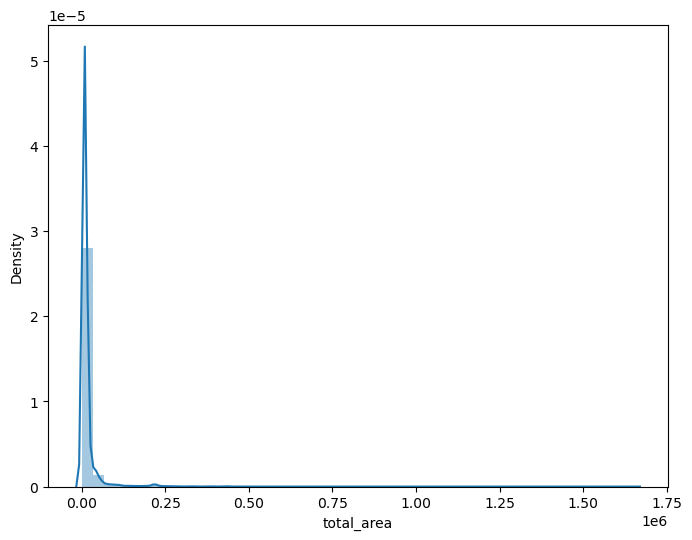

In [94]:
plt.figure(figsize=(8,6))
sns.distplot(df['total_area'])

**Distributions tells that it is highly right skewed**

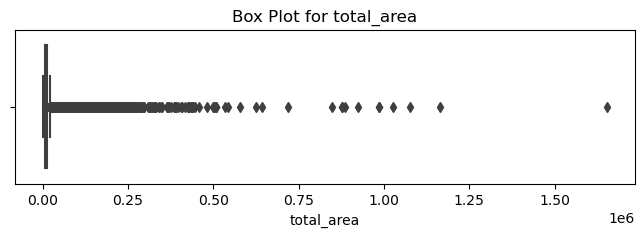

In [95]:
plt.figure(figsize=(8, 2))  # Adjust the figure size if needed
sns.boxplot(df['total_area'])


plt.xlabel('total_area')
plt.title('Box Plot for total_area')
plt.show()

**There are many outliers in total_area. Need to review further to treat the same.**

### Analyzing Feature: State

In [96]:
df.State.value_counts()

Washington    21613
Name: State, dtype: int64

**We can see there is only state called Washington in this dataset**

### Analyzing Feature: City

In [97]:
df.City.value_counts()

Seattle           6799
Renton            1597
Kent              1203
Bellevue          1090
Redmond            979
Kirkland           977
Tukwila            853
Federal way        779
Maple valley       590
Lk forest park     446
REDMOND            441
Issaquah           412
Algona             362
ISSAQUAH           359
Zcta 98092         351
Zcta 98029         321
Beaux arts         317
Normandy park      311
Snoqualmie         310
Burien             288
Kenmore            283
Mercer island      282
Des moines         280
Woodinville        273
Enumclaw           234
North bend         221
Auburn             199
WOODINVILLE        198
Bothell            195
Duvall             190
Carnation          124
Vashon             118
Black diamond      100
Fall city           81
Medina              50
Name: City, dtype: int64

<AxesSubplot:xlabel='count', ylabel='City'>

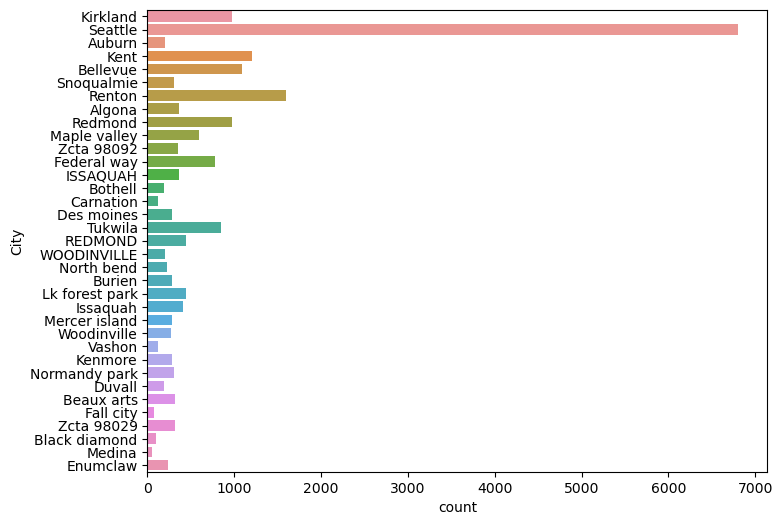

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(y='City',data=df,orient='h')

**from this count plot we can compare number of houses between cities**

## BIVARIATE ANALYSIS

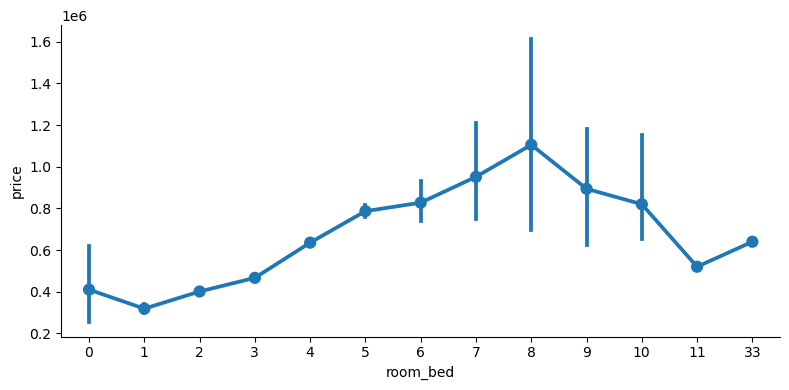

In [99]:
sns.factorplot(x='room_bed',y='price',data=df, size=4, aspect=2)

**We can see that there is clear increasing trend in price with room_bed but for 33 room bed price is less which can be considered as an outlier**

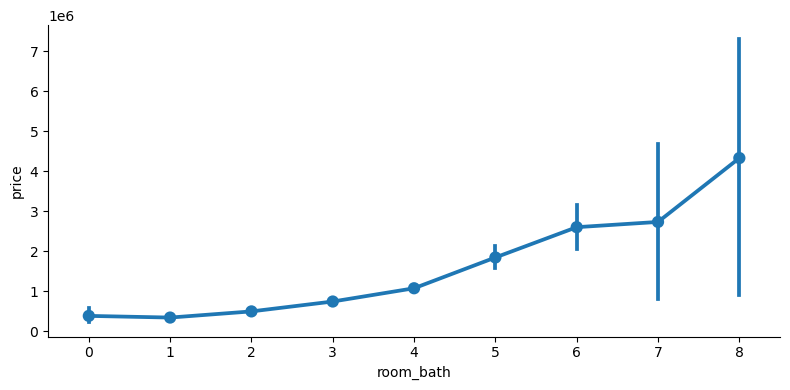

In [100]:
sns.factorplot(x='room_bath',y='price',data=df,size=4, aspect=2)

**There is upward trend in price with increase in room_bath**

AxesSubplot(0.125,0.11;0.775x0.77)


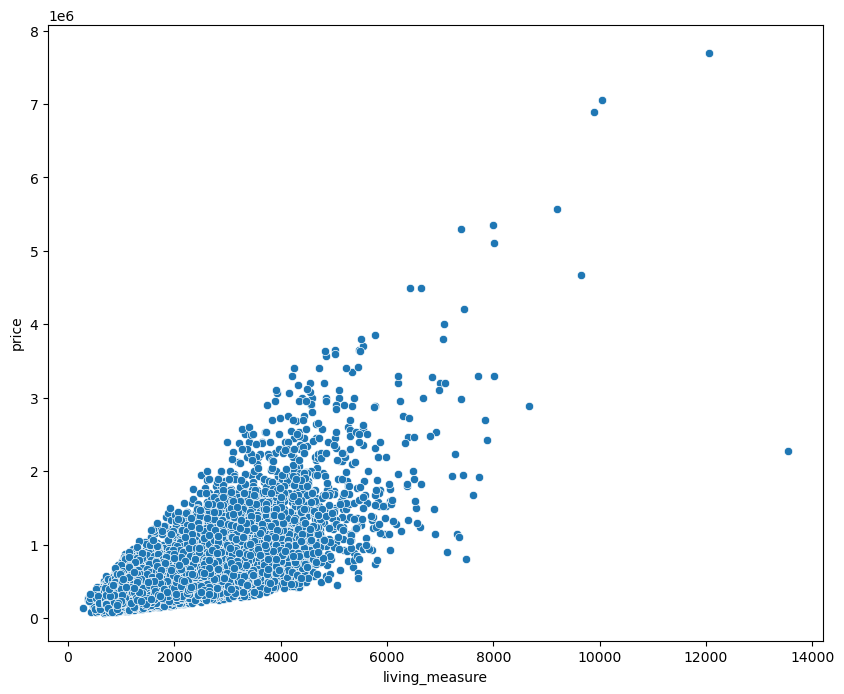

In [101]:
plt.figure(figsize=(10,8))
print(sns.scatterplot(df['living_measure'],df['price']))

**There is clear increment in price with respect to increment in living measure but there seems to be some outlier need to evaluate the same**

AxesSubplot(0.125,0.11;0.775x0.77)


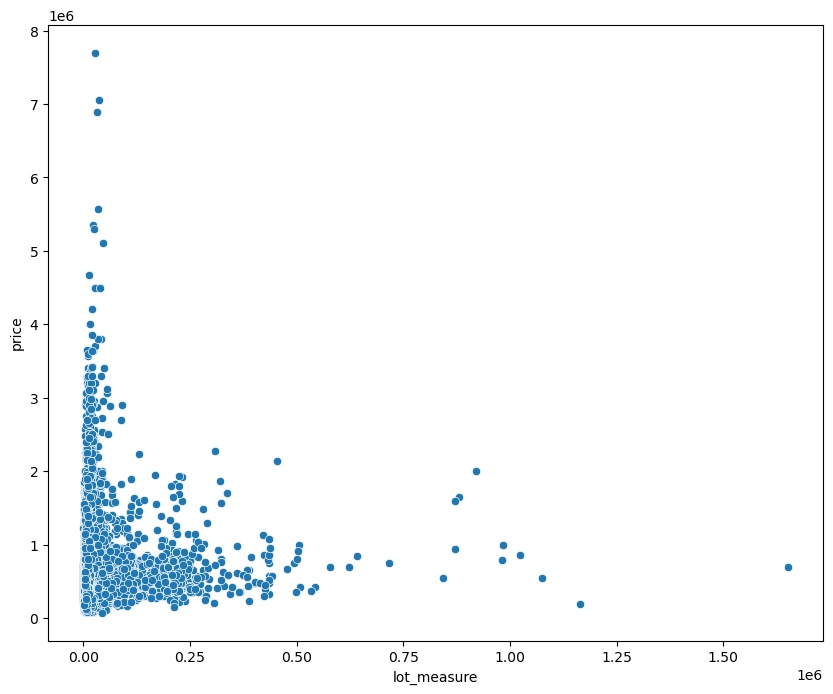

In [102]:
plt.figure(figsize=(10,8))
print(sns.scatterplot(df['lot_measure'],df['price']))

**data value range is very large and there doesn't seem to be no relation between lot_measure and price trend**

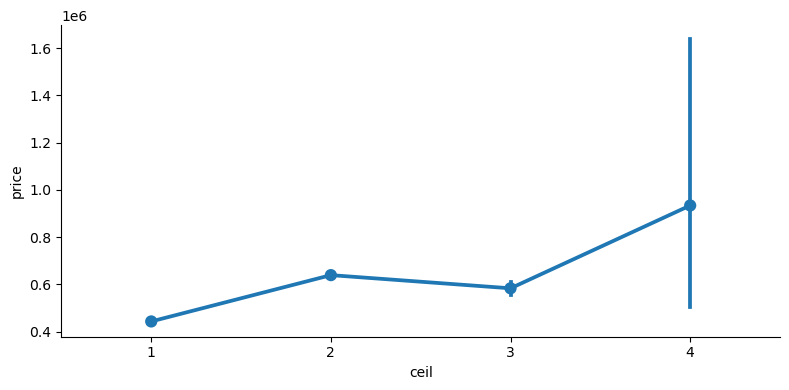

In [103]:
print(sns.factorplot(x='ceil',y='price',data=df, size = 4, aspect = 2))

**price increases with increase in ceil**

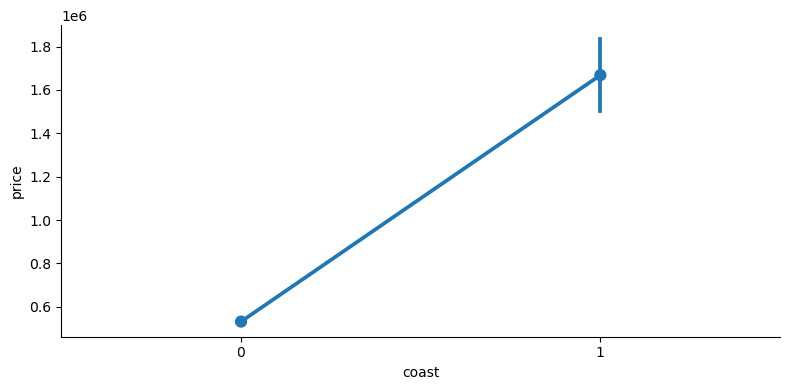

In [104]:
print(sns.factorplot(x='coast',y='price',data=df, size = 4, aspect = 2))

**The house with coast view have higher price compared to that of non-coast view**

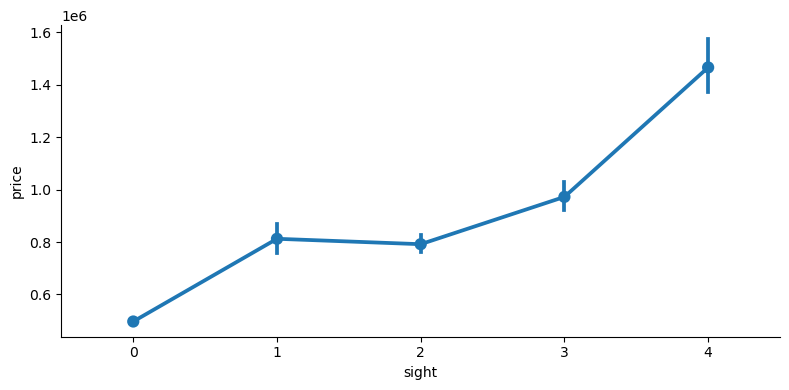

In [105]:
print(sns.factorplot(x='sight',y='price',data=df, size = 4, aspect = 2))

**Houses with higher price have more no.of sights compared to that of houses with lower price**

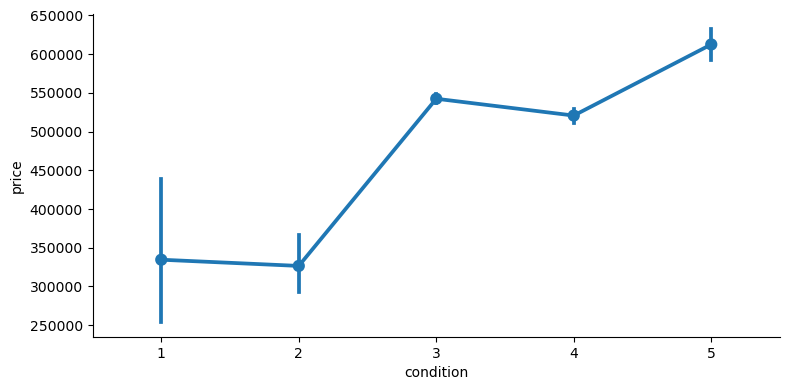

In [106]:
print(sns.factorplot(x='condition',y='price',data=df, size = 4, aspect = 2))

**As the condition of the house increases price of the house also increases**

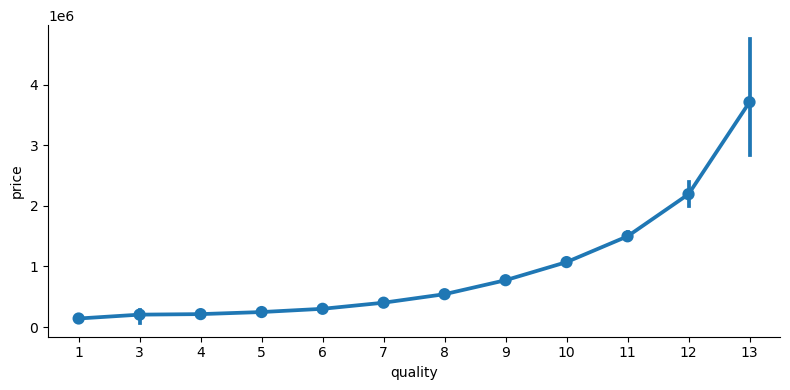

In [107]:
print(sns.factorplot(x='quality',y='price',data=df, size = 4, aspect = 2))

**There is a clear increase in the price of the house with respect to quality**

AxesSubplot(0.125,0.11;0.775x0.77)


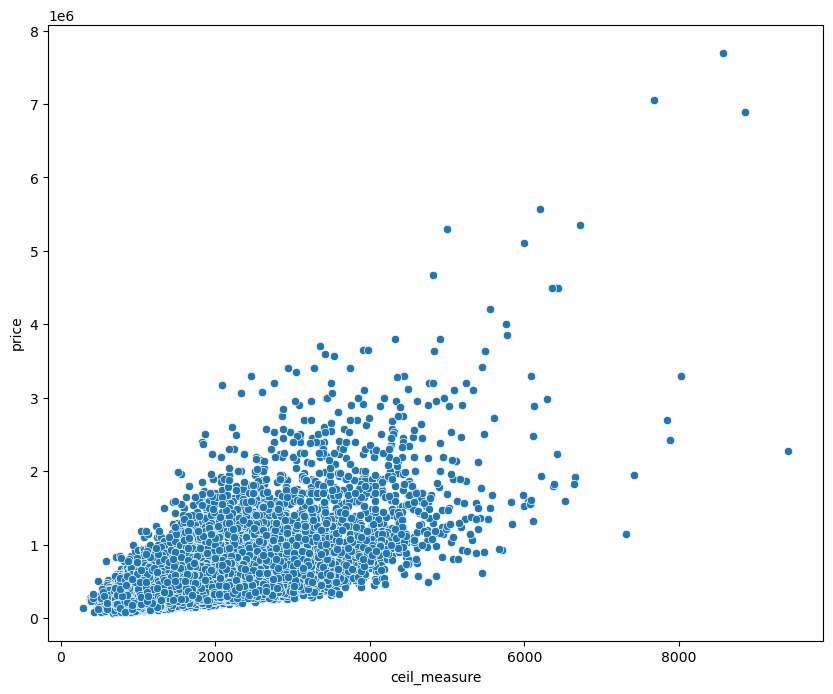

In [108]:
plt.figure(figsize=(10,8))
print(sns.scatterplot(df['ceil_measure'],df['price']))

**price increases with increase in ceil measure but can see some outliers that will be taken care of**

AxesSubplot(0.125,0.11;0.775x0.77)


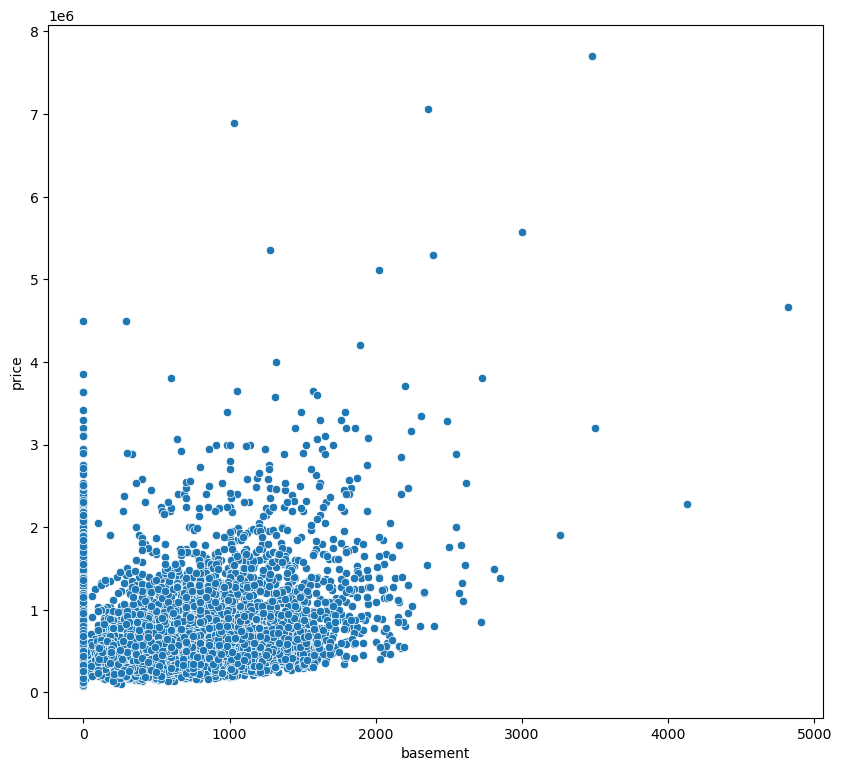

In [109]:
plt.figure(figsize=(10, 9))
print(sns.scatterplot(df['basement'],df['price']))

**prices are high even when basement is 0 and price increases when basement increases**

AxesSubplot(0.125,0.11;0.775x0.77)


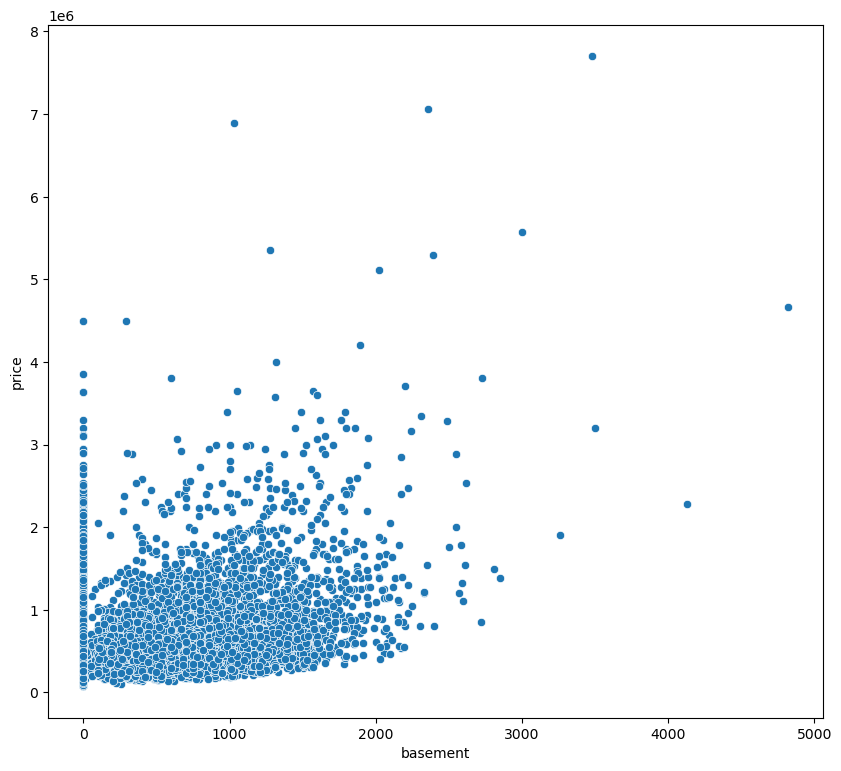

In [110]:
plt.figure(figsize=(10, 9))
print(sns.scatterplot(df_base['basement'],df['price']))

**price increases with increase in basement which is greater than 0  but can see some outliers that will be taken care of**

AxesSubplot(0.125,0.11;0.775x0.77)


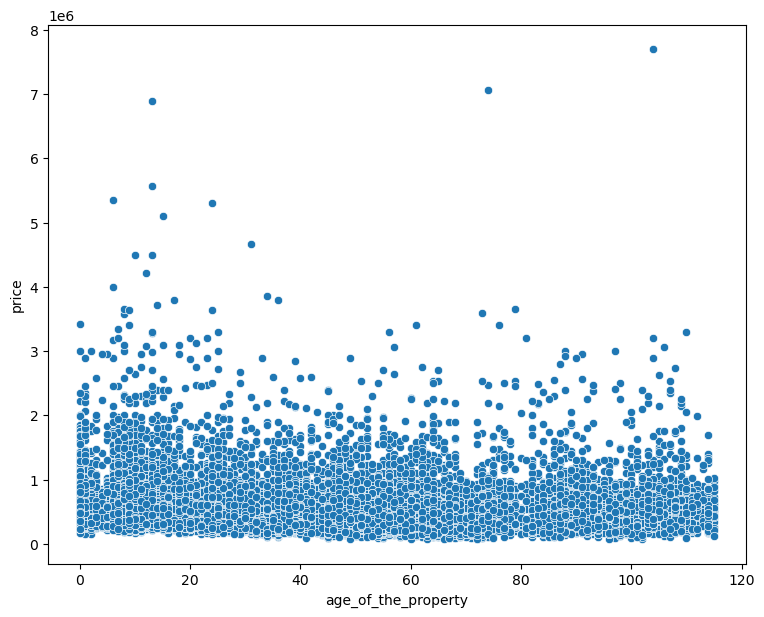

In [111]:
plt.figure(figsize=(9, 7))
print(sns.scatterplot(df['age_of_the_property'],df['price']))

**If age of house is less then price will be more which can be seen from the chart and there are some outliers which can be seen**

<AxesSubplot:xlabel='price', ylabel='City'>

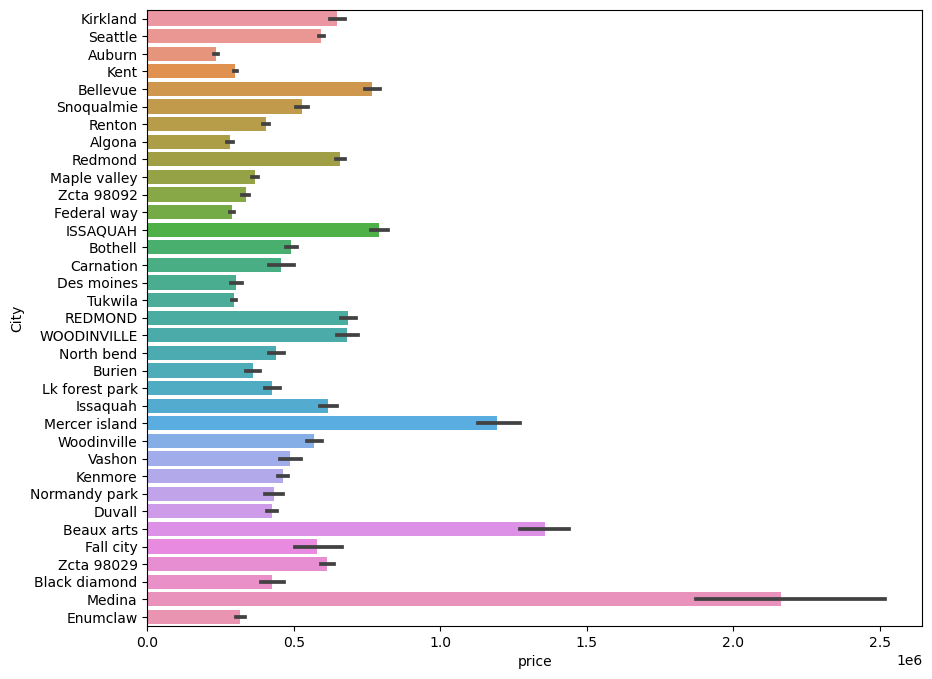

In [112]:
plt.figure(figsize=(10, 8)) 
sns.barplot(data=df, x='price', y='City', orient='h')

**Prices between the cities can be compared and Enumclaw is costliest city**

## MULTIVARIATE ANALYSIS

AxesSubplot(0.125,0.11;0.775x0.77)


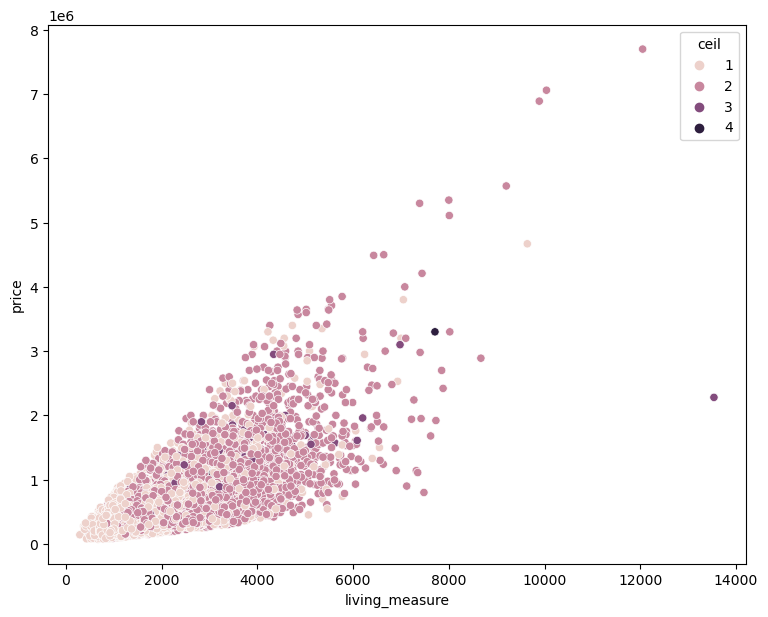

In [113]:
plt.figure(figsize=(9, 7))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['ceil']))

**we can see that price is increasing with increasing in living_measure and increasing in ceil**

AxesSubplot(0.125,0.11;0.775x0.77)


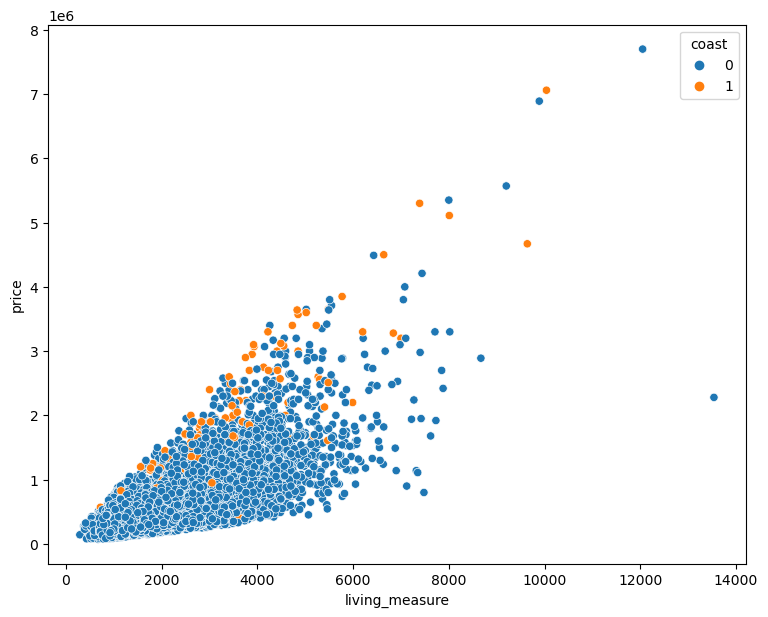

In [114]:
plt.figure(figsize=(9, 7))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['coast']))

**It is clearly seen that price is high for those houses with coast view and other houses with same living measure without coast has less price**

AxesSubplot(0.125,0.11;0.775x0.77)


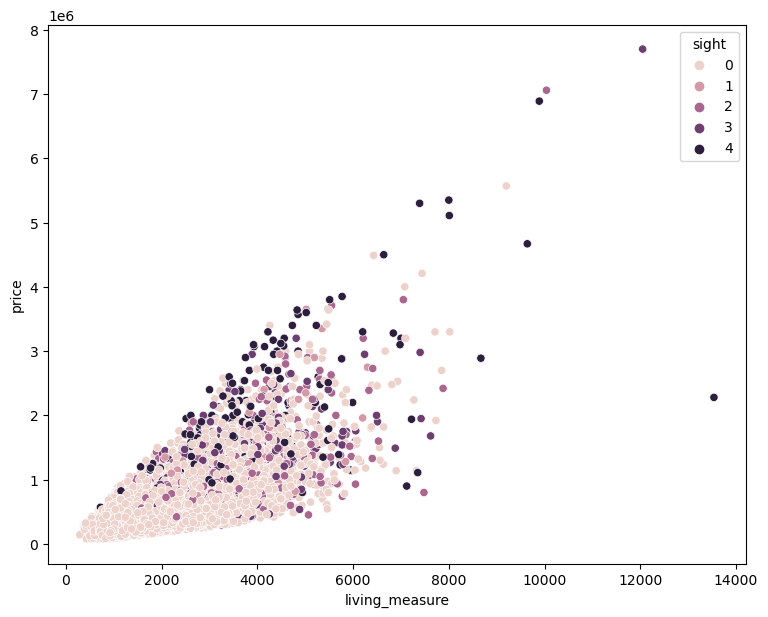

In [115]:
plt.figure(figsize=(9, 7))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['sight']))

**It is clearly seen that price is high for those houses with high sight and for other houses with same living measure with low sight value has less price**

AxesSubplot(0.125,0.11;0.775x0.77)


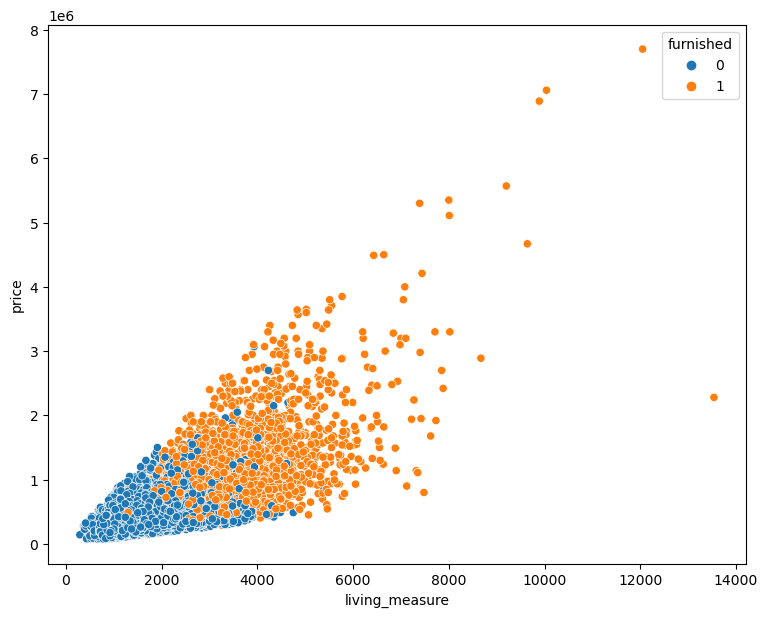

In [116]:
plt.figure(figsize=(9, 7))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['furnished']))

**Furnished houses have higher price than that of the Non-furnished houses**

<AxesSubplot:>

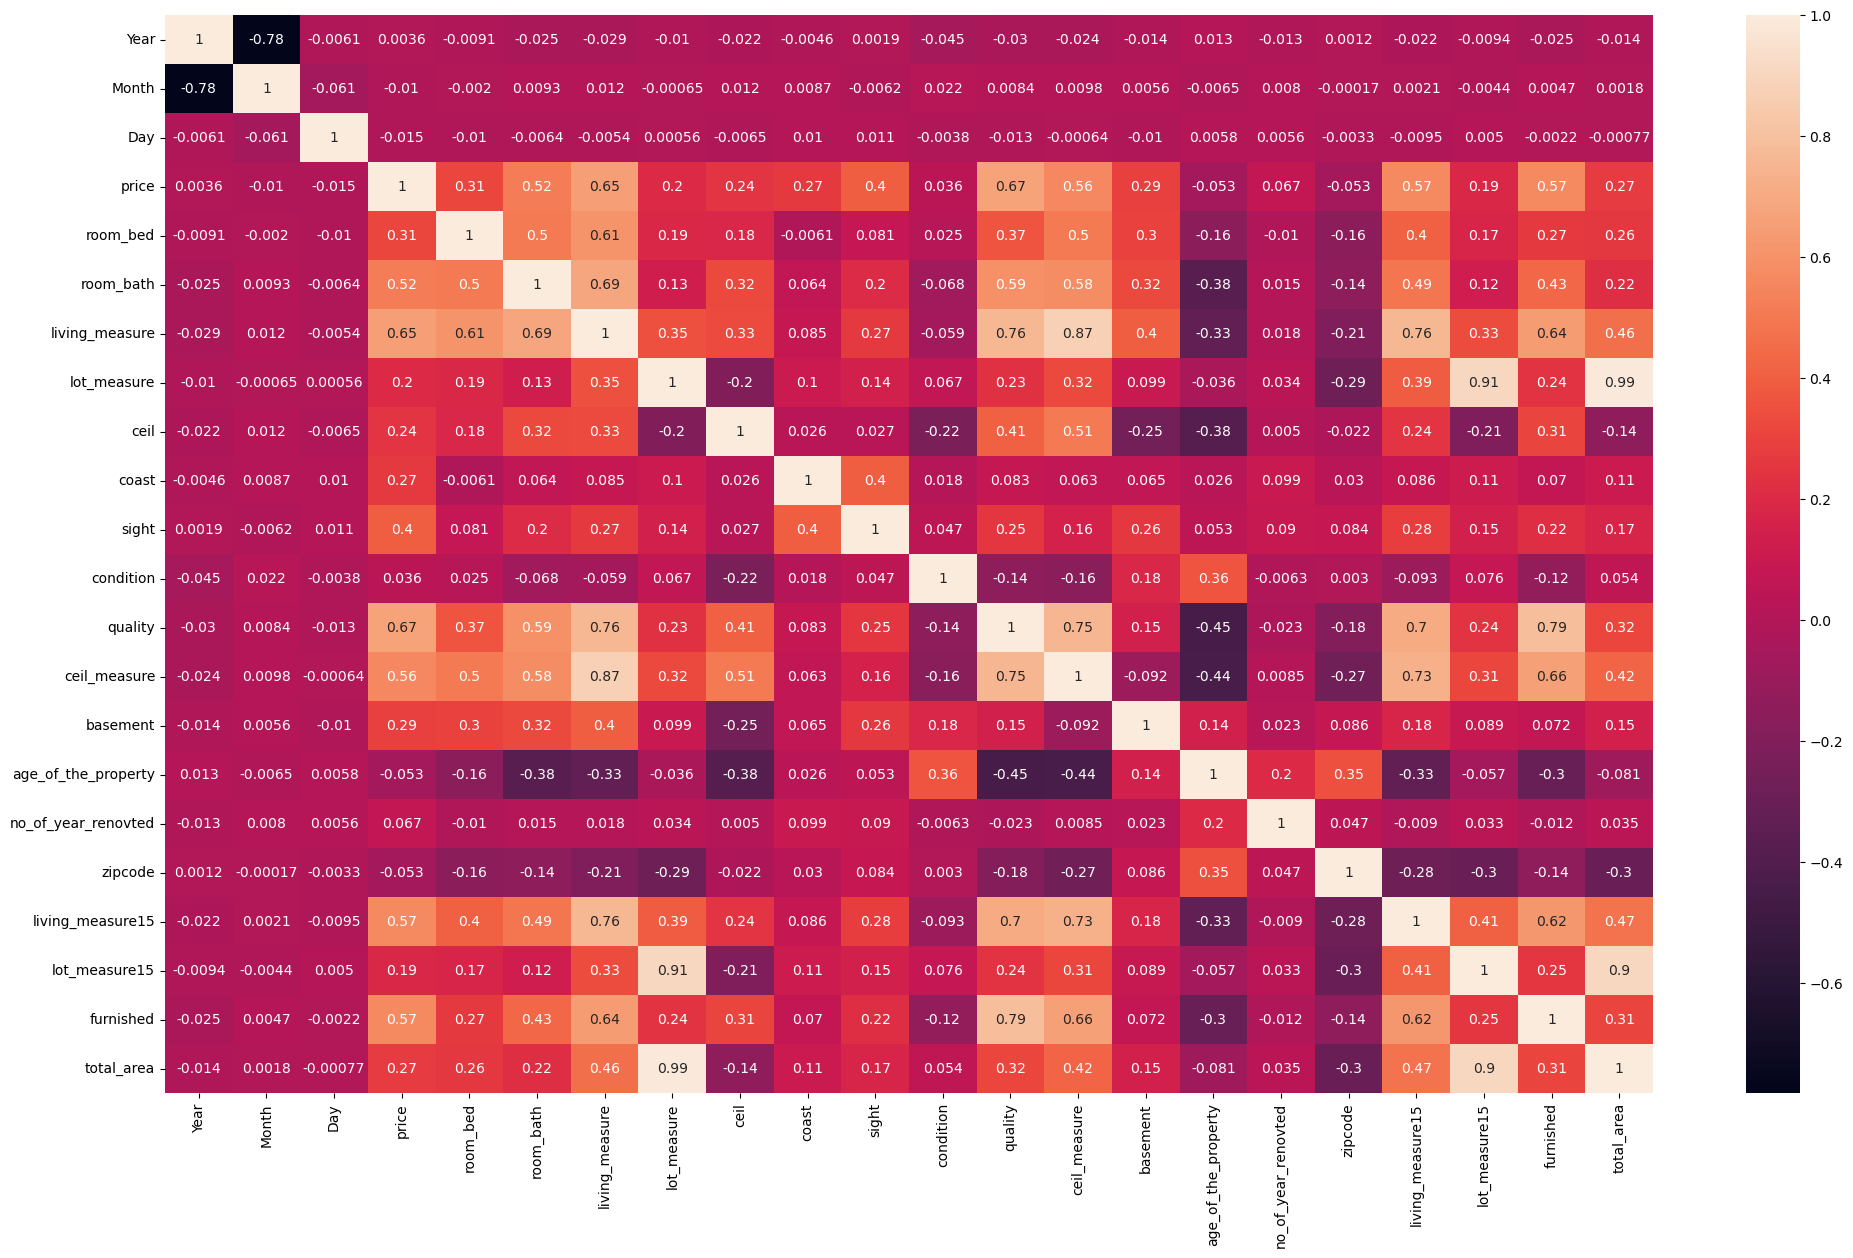

In [216]:
plt.subplots(figsize =(24, 14)) 
sns.heatmap(feature_corr,annot=True)

**Corelation between the features can be checked** 

i e ,linear relationship of features with other features

price: room_bath, living_measure, quality, living_measure15, furnished

living_measure: price, room_bath

quality: price, room_bath, living_measure

ceil_measure: price, room_bath, living_measure, quality

living_measure15: price, living_measure, quality

lot_measure15: lot_measure

furnished: quality

total_area: lot_measure, lot_measure15

## DATA PREPROCESSING



**Treating outliers**


In [117]:
import numpy as np
def outlier_treatment(dcol):
    sorted(dcol)
    Q1,Q3 = np.percentile(dcol , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

**Using the above function, lets get the lowerbound and upperbound values**

**Treating outliers for column - ceil_measure**

In [118]:
lb,ub = outlier_treatment(df.ceil_measure)
print(lb,ub)

-340.0 3740.0


**Lets check which row is considered as an outlier**

In [120]:
df[(df.ceil_measure < lb) | (df.ceil_measure > ub)]

,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
127,2014,12,16,1050000,4,3,4160,47480,2,0,...,0,19,0,98072,Washington,Woodinville,3400,40428,1,51640
155,2015,3,4,2140000,6,4,5110,7128,2,0,...,0,109,0,98112,Washington,Seattle,4110,6480,1,12238
161,2014,12,10,775000,3,2,3820,35016,2,0,...,0,27,0,98053,Washington,Redmond,3010,35190,1,38836
178,2014,7,8,1140000,5,4,7320,217800,2,0,...,0,22,0,98058,Washington,Renton,3270,34500,1,225120
184,2014,6,18,1600000,6,5,6050,230652,2,0,...,0,13,0,98024,Washington,Fall city,4210,233971,1,236702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,2014,9,3,665000,4,4,3770,47480,2,0,...,0,11,0,98010,Washington,Black diamond,3380,42689,1,51250
21518,2014,7,1,920000,4,4,4080,10666,2,0,...,0,9,0,98053,Washington,Redmond,3920,8154,1,14746
21564,2014,6,19,805000,3,3,3910,19023,2,0,...,0,29,0,98014,Washington,Carnation,1860,15001,1,22933
21570,2015,1,27,1840000,4,4,4870,39190,2,0,...,0,20,0,98006,Washington,Bellevue,5000,33880,1,44060


**We got 611 records as outliers, We can either drop this columns or we can apply capping technique , but let's use capping**

In [121]:
#df.drop(df[ (df.ceil_measure > ub) | (df.ceil_measure < lb) ].index, inplace=True)

In [122]:
df['ceil_measure']=np.where(df['ceil_measure'] > ub , ub ,np.where(df['ceil_measure'] < lb , lb,df['ceil_measure']))

**All the records which had value less than lowerbound is replaced by lower bound and all thye value which had value greater than upper bound is replace by upper bound**

<AxesSubplot:xlabel='ceil_measure'>

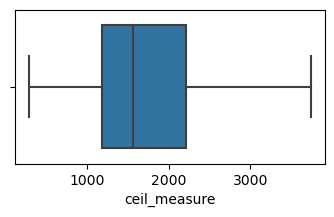

In [123]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['ceil_measure'])

**After successfully replacing the values we can see there are no more outliers**

**Treating outliers for column - basement**

In [127]:
lb,ub = outlier_treatment(df.basement)
print(lb,ub)

-840.0 1400.0


**Lets check which row is considered as an outlier**

In [128]:
df[(df.basement < lb) | (df.basement > ub)]

,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
88,2014,7,15,1380000,5,4,3760,22763,1,0,...,1850,45,0,98040,Washington,Mercer island,3730,11201,1,26523
145,2014,6,12,1330000,5,2,3200,20158,1,0,...,1600,49,0,98004,Washington,Beaux arts,3390,20158,0,23358
146,2015,4,10,1610000,4,4,3920,19088,1,0,...,1680,10,0,98040,Washington,Mercer island,3800,13749,1,23008
173,2014,6,18,975000,4,2,4270,43386,1,0,...,1590,23,0,98053,Washington,Redmond,3630,36180,1,47656
185,2014,7,24,379000,5,3,3000,25175,1,0,...,1500,53,0,98027,Washington,Issaquah,2170,40523,0,28175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21434,2015,3,20,595000,5,3,3740,6750,1,0,...,1760,37,0,98028,Washington,Kenmore,2620,7920,0,10490
21439,2015,2,17,345000,5,2,3150,9134,1,0,...,1510,49,0,98056,Washington,Renton,1990,9133,0,12284
21452,2015,5,6,390000,4,2,3060,7920,1,0,...,1530,50,0,98178,Washington,Tukwila,1850,7800,0,10980
21496,2015,4,23,1050000,6,4,5310,12741,2,0,...,1710,48,0,98040,Washington,Mercer island,4190,12632,1,18051


**We got 496 records as outliers, We can either drop this columns or we can apply capping technique , but let's use capping**

In [130]:
#df.drop(df[ (df.basement > ub) | (df.basement < lb) ].index, inplace=True)

In [131]:
df['basement']=np.where(df['basement'] > ub , ub ,np.where(df['basement'] < lb , lb,df['basement']))

**All the records which had value less than lowerbound is replaced by lower bound and all thye value which had value greater than upper bound is replace by upper bound**

<AxesSubplot:xlabel='basement'>

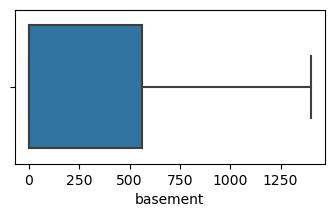

In [132]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['basement'])

**After successfully replacing the values we can see there are no more outliers**

**Treating outliers for column - living_measure**

In [133]:
lb,ub = outlier_treatment(df.living_measure)
print(lb,ub)

-250.0 4230.0


**Lets check which rows are considered as an outlier**

In [134]:
df[(df.living_measure < lb) | (df.living_measure > ub)]

,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
7,2014,6,18,1160000,4,4,4680,9700,2,0,...,1320.0,9,0,98006,Washington,Bellevue,2800,12343,1,14380
155,2015,3,4,2140000,6,4,5110,7128,2,0,...,0.0,109,0,98112,Washington,Seattle,4110,6480,1,12238
173,2014,6,18,975000,4,2,4270,43386,1,0,...,1400.0,23,0,98053,Washington,Redmond,3630,36180,1,47656
178,2014,7,8,1140000,5,4,7320,217800,2,0,...,0.0,22,0,98058,Washington,Renton,3270,34500,1,225120
184,2014,6,18,1600000,6,5,6050,230652,2,0,...,0.0,13,0,98024,Washington,Fall city,4210,233971,1,236702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21432,2014,11,24,3120000,3,4,4490,56609,2,1,...,0.0,21,0,98034,Washington,Kirkland,2710,51330,1,61099
21476,2014,11,14,3850000,4,4,5770,21300,2,1,...,0.0,34,0,98040,Washington,Mercer island,4620,22748,1,27070
21496,2015,4,23,1050000,6,4,5310,12741,2,0,...,1400.0,48,0,98040,Washington,Mercer island,4190,12632,1,18051
21504,2014,5,28,1400000,4,3,4700,9160,1,0,...,1400.0,9,0,98116,Washington,Seattle,2240,8700,1,13860


**We got 572 records as outliers, We can either drop this columns or we can apply capping technique , but let's use capping**

In [136]:
#df.drop(df[ (df.living_measure > ub) | (df.living_measure < lb) ].index, inplace=True)

In [137]:
df['living_measure']=np.where(df['living_measure'] > ub , ub ,np.where(df['living_measure'] < lb , lb,df['living_measure']))

**All the records which had value less than lowerbound is replaced by lower bound and all thye value which had value greater than upper bound is replace by upper bound**

<AxesSubplot:xlabel='living_measure'>

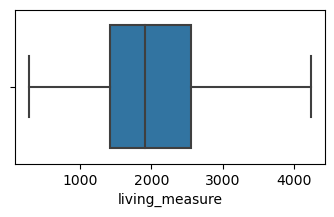

In [138]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['living_measure'])

**After successfully replacing the values we can see there are no more outliers**

**Treating outliers for column - lot_measure**

In [140]:
lb,ub = outlier_treatment(df.lot_measure)
print(lb,ub)

-3382.5 19085.5


**Lets check which rows are considered as an outlier**

In [142]:
df[(df.lot_measure < lb) | (df.lot_measure > ub)]

,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
12,2014,10,29,480000,3,2,2450.0,28185,2,0,...,0.0,24,0,98058,Washington,Renton,2440,33541,1,30635
25,2014,12,30,250000,1,1,720.0,123710,1,0,...,0.0,79,0,98092,Washington,Zcta 98092,1860,297514,0,124430
28,2014,8,29,635000,4,2,2470.0,77550,1,0,...,0.0,27,0,98075,Washington,ISSAQUAH,2490,40894,0,80020
37,2014,6,10,740000,3,2,3000.0,25341,2,0,...,0.0,19,0,98053,Washington,Redmond,3000,32417,1,28341
87,2014,9,4,505000,3,2,1830.0,217800,1,0,...,820.0,33,0,98053,Washington,Redmond,2450,165963,0,219630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21581,2014,10,19,549950,3,2,2930.0,266587,2,0,...,490.0,19,0,98014,Washington,Carnation,2700,438213,0,269517
21582,2014,8,26,255000,2,1,1610.0,19965,1,0,...,0.0,62,0,98168,Washington,Tukwila,2100,28400,0,21575
21589,2015,5,6,513000,3,2,2150.0,161607,2,0,...,820.0,20,0,98038,Washington,Maple valley,2400,207781,0,163757
21608,2015,3,10,685530,4,2,3130.0,60467,2,0,...,0.0,19,0,98014,Washington,Carnation,2780,44224,1,63597


**We got 2426 records as outliers, We can either drop this columns or we can apply capping technique , but let's use capping**

In [143]:
#df.drop(df[ (df.lot_measure > ub) | (df.lot_measure < lb) ].index, inplace=True)

In [144]:
df['lot_measure']=np.where(df['lot_measure'] > ub , ub ,np.where(df['lot_measure'] < lb , lb,df['lot_measure']))

**All the records which had value less than lowerbound is replaced by lower bound and all thye value which had value greater than upper bound is replace by upper bound**

<AxesSubplot:xlabel='lot_measure'>

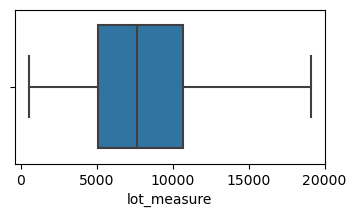

In [145]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['lot_measure'])

**After successfully replacing the values we can see there are no more outliers**

**Treating outliers for column - room_bed**

In [146]:
df[df['room_bed']==33]

,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
16913,2014,6,25,640000,33,2,1620.0,6000.0,1,0,...,580.0,67,0,98103,Washington,Seattle,1330,4700,0,7620


**As we know for room_bed = 33 was outlier from our earlier findings, let's drop it**

In [147]:
df.drop(df[ (df.room_bed == 33) ].index, inplace=True)

**As we have dropped the record lets check the shape**

In [151]:
df.shape

(21612, 24)

**Treating outliers for column - living_measure15**

In [152]:
lb,ub = outlier_treatment(df.living_measure15)
print(lb,ub)

185.0 3665.0


**Lets check which rows are considered as an outlier**

In [154]:
df[(df.living_measure15 < lb) | (df.living_measure15 > ub)]

,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
88,2014,7,15,1380000,5,4,3760.0,19085.5,1,0,...,1400.0,45,0,98040,Washington,Mercer island,3730,11201,1,26523
91,2014,5,20,625000,4,2,3550.0,8048.0,2,0,...,0.0,7,0,98065,Washington,Snoqualmie,3920,7871,1,11598
146,2015,4,10,1610000,4,4,3920.0,19085.5,1,0,...,1400.0,10,0,98040,Washington,Mercer island,3800,13749,1,23008
155,2015,3,4,2140000,6,4,4230.0,7128.0,2,0,...,0.0,109,0,98112,Washington,Seattle,4110,6480,1,12238
184,2014,6,18,1600000,6,5,4230.0,19085.5,2,0,...,0.0,13,0,98024,Washington,Fall city,4210,233971,1,236702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21496,2015,4,23,1050000,6,4,4230.0,12741.0,2,0,...,1400.0,48,0,98040,Washington,Mercer island,4190,12632,1,18051
21518,2014,7,1,920000,4,4,4080.0,10666.0,2,0,...,0.0,9,0,98053,Washington,Redmond,3920,8154,1,14746
21570,2015,1,27,1840000,4,4,4230.0,19085.5,2,0,...,0.0,20,0,98006,Washington,Bellevue,5000,33880,1,44060
21593,2014,5,6,725126,4,2,3200.0,12369.0,2,0,...,0.0,16,0,98059,Washington,Renton,3770,12960,1,15569


**We got 540 records as outliers, We can either drop this columns or we can apply capping technique , but let's use capping**

In [156]:
#df.drop(df[ (df.living_measure15 > ub) | (df.living_measure15 < lb) ].index, inplace=True)

In [157]:
df['living_measure15']=np.where(df['living_measure15'] > ub , ub ,np.where(df['living_measure15'] < lb , lb,df['living_measure15']))

**All the records which had value less than lowerbound is replaced by lower bound and all thye value which had value greater than upper bound is replace by upper bound**

<AxesSubplot:xlabel='living_measure15'>

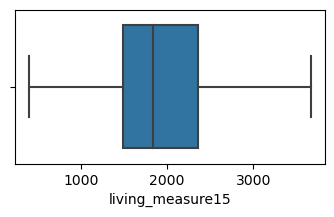

In [158]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['living_measure15'])

**After successfully replacing the values we can see there are no more outliers**

**Treating outliers for column - lot_measure15**

In [161]:
lb,ub = outlier_treatment(df.lot_measure15)
print(lb,ub)

-2370.0 17550.0


**Lets check which rows are considered as an outlier**

In [162]:
df[(df.lot_measure15 < lb) | (df.lot_measure15 > ub)]

,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
12,2014,10,29,480000,3,2,2450.0,19085.5,2,0,...,0.0,24,0,98058,Washington,Renton,2440.0,33541,1,30635
25,2014,12,30,250000,1,1,720.0,19085.5,1,0,...,0.0,79,0,98092,Washington,Zcta 98092,1860.0,297514,0,124430
28,2014,8,29,635000,4,2,2470.0,19085.5,1,0,...,0.0,27,0,98075,Washington,ISSAQUAH,2490.0,40894,0,80020
37,2014,6,10,740000,3,2,3000.0,19085.5,2,0,...,0.0,19,0,98053,Washington,Redmond,3000.0,32417,1,28341
87,2014,9,4,505000,3,2,1830.0,19085.5,1,0,...,820.0,33,0,98053,Washington,Redmond,2450.0,165963,0,219630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,2014,8,26,255000,2,1,1610.0,19085.5,1,0,...,0.0,62,0,98168,Washington,Tukwila,2100.0,28400,0,21575
21589,2015,5,6,513000,3,2,2150.0,19085.5,2,0,...,820.0,20,0,98038,Washington,Maple valley,2400.0,207781,0,163757
21604,2014,5,27,960000,5,4,3720.0,15200.0,2,0,...,0.0,9,0,98075,Washington,ISSAQUAH,3665.0,19036,1,18920
21608,2015,3,10,685530,4,2,3130.0,19085.5,2,0,...,0.0,19,0,98014,Washington,Carnation,2780.0,44224,1,63597


**We got 2192 records as outliers, We can either drop this columns or we can apply capping technique , but let's use capping**

In [163]:
#df.drop(df[ (df.lot_measure15 > ub) | (df.lot_measure15 < lb) ].index, inplace=True)

In [164]:
df['lot_measure15']=np.where(df['lot_measure15'] > ub , ub ,np.where(df['lot_measure15'] < lb , lb,df['lot_measure15']))

**All the records which had value less than lowerbound is replaced by lower bound and all thye value which had value greater than upper bound is replace by upper bound**

<AxesSubplot:xlabel='lot_measure15'>

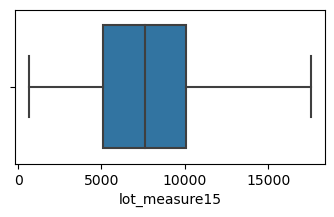

In [165]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['lot_measure15'])

**After successfully replacing the values we can see there are no more outliers**

**Treating outliers for column - total_area**

In [166]:
lb,ub = outlier_treatment(df.total_area)
print(lb,ub)

-1855.0 21865.0


**Lets check which rows are considered as an outlier**

In [167]:
df[(df.total_area < lb) | (df.total_area > ub)]

,Year,Month,Day,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
12,2014,10,29,480000,3,2,2450.0,19085.5,2,0,...,0.0,24,0,98058,Washington,Renton,2440.0,17550.0,1,30635
25,2014,12,30,250000,1,1,720.0,19085.5,1,0,...,0.0,79,0,98092,Washington,Zcta 98092,1860.0,17550.0,0,124430
28,2014,8,29,635000,4,2,2470.0,19085.5,1,0,...,0.0,27,0,98075,Washington,ISSAQUAH,2490.0,17550.0,0,80020
37,2014,6,10,740000,3,2,3000.0,19085.5,2,0,...,0.0,19,0,98053,Washington,Redmond,3000.0,17550.0,1,28341
87,2014,9,4,505000,3,2,1830.0,19085.5,1,0,...,820.0,33,0,98053,Washington,Redmond,2450.0,17550.0,0,219630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21572,2014,8,25,619000,3,2,2560.0,19085.5,2,0,...,0.0,12,0,98077,Washington,WOODINVILLE,3000.0,17550.0,1,46168
21581,2014,10,19,549950,3,2,2930.0,19085.5,2,0,...,490.0,19,0,98014,Washington,Carnation,2700.0,17550.0,0,269517
21589,2015,5,6,513000,3,2,2150.0,19085.5,2,0,...,820.0,20,0,98038,Washington,Maple valley,2400.0,17550.0,0,163757
21608,2015,3,10,685530,4,2,3130.0,19085.5,2,0,...,0.0,19,0,98014,Washington,Carnation,2780.0,17550.0,1,63597


**We got 2418 records as outliers, We can either drop this columns or we can apply capping technique , but let's use capping**

In [169]:
#df.drop(df[ (df.total_area > ub) | (df.total_area < lb) ].index, inplace=True)

In [170]:
df['total_area']=np.where(df['total_area'] > ub , ub ,np.where(df['total_area'] < lb , lb,df['total_area']))

**All the records which had value less than lowerbound is replaced by lower bound and all thye value which had value greater than upper bound is replace by upper bound**

<AxesSubplot:xlabel='total_area'>

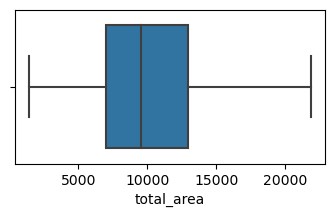

In [171]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['total_area'])

**After successfully replacing the values we can see there are no more outliers**

## Model Building

In [173]:
X = df.drop(['price'], axis=1)
y =df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Storing all the independent feature in X and dependent feature in y using train test split to split the data**

In [174]:
X_train.head()

,Year,Month,Day,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,age_of_the_property,no_of_year_renovted,zipcode,State,City,living_measure15,lot_measure15,furnished,total_area
6325,2015,4,27,3,1,2400.0,17239.0,1,0,0,...,510.0,75,0,98028,Washington,Kenmore,2390.0,7350.0,0,19639.0
13473,2014,8,18,4,3,2090.0,14141.0,2,0,0,...,410.0,73,0,98166,Washington,Normandy park,1990.0,12920.0,0,16231.0
17615,2014,6,20,3,2,1700.0,14133.0,1,0,1,...,0.0,60,0,98004,Washington,Beaux arts,2630.0,17376.0,0,15833.0
16971,2014,6,12,3,3,1470.0,1235.0,2,0,0,...,290.0,6,0,98108,Washington,Tukwila,1470.0,1243.0,0,2705.0
20868,2014,11,19,3,2,1090.0,8400.0,1,0,0,...,0.0,48,0,98008,Washington,Bellevue,1320.0,8400.0,0,9490.0


**check the X_train by printing first few records**

**Categorical features can be handeled by using pandas get dummies or One Hot Encoding , we are using One Hot Encoding with columnn transformer**

In [175]:
transformer = ColumnTransformer(transformers=[('t1',OneHotEncoder(sparse=False),['State','City'])],remainder='passthrough')

**Created column transformer object specifying which columns should be transformed using one hot encoding**

In [176]:
X_train_new = transformer.fit_transform(X_train)

**Here, X_train is input dataset containing both numerical and categorical columns. fitted with transformer object and stored in X_train_new**

In [177]:
col_names=transformer.get_feature_names()

**col_names contain all the names of the column**

In [178]:
X_train1 = pd.DataFrame(X_train_new,columns=col_names)

**Adding column names to X_train_new and storing in X_train1**

In [180]:
X_train1.head()

,t1__x0_Washington,t1__x1_Algona,t1__x1_Auburn,t1__x1_Beaux arts,t1__x1_Bellevue,t1__x1_Black diamond,t1__x1_Bothell,t1__x1_Burien,t1__x1_Carnation,t1__x1_Des moines,...,quality,ceil_measure,basement,age_of_the_property,no_of_year_renovted,zipcode,living_measure15,lot_measure15,furnished,total_area
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,1890.0,510.0,75.0,0.0,98028.0,2390.0,7350.0,0.0,19639.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,1680.0,410.0,73.0,0.0,98166.0,1990.0,12920.0,0.0,16231.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,1700.0,0.0,60.0,0.0,98004.0,2630.0,17376.0,0.0,15833.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,1180.0,290.0,6.0,0.0,98108.0,1470.0,1243.0,0.0,2705.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.0,1090.0,0.0,48.0,0.0,98008.0,1320.0,8400.0,0.0,9490.0


In [181]:
X_test_new = transformer.fit_transform(X_test)

**Here, X_test is input dataset containing both numerical and categorical columns. fitted with transformer object and stored in X_test_new**

In [182]:
X_test1 = pd.DataFrame(X_test_new,columns=col_names)

**Adding column names to X_test_new and storing in X_test1**

In [184]:
X_test1.head()

,t1__x0_Washington,t1__x1_Algona,t1__x1_Auburn,t1__x1_Beaux arts,t1__x1_Bellevue,t1__x1_Black diamond,t1__x1_Bothell,t1__x1_Burien,t1__x1_Carnation,t1__x1_Des moines,...,quality,ceil_measure,basement,age_of_the_property,no_of_year_renovted,zipcode,living_measure15,lot_measure15,furnished,total_area
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,1930.0,0.0,22.0,0.0,98031.0,1930.0,7525.0,0.0,11573.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,3740.0,0.0,46.0,0.0,98040.0,2820.0,10871.0,1.0,21865.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,3740.0,0.0,2.0,0.0,98053.0,3665.0,17550.0,1.0,21865.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,1320.0,930.0,30.0,0.0,98023.0,1800.0,6950.0,0.0,9595.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,7.0,1040.0,750.0,54.0,0.0,98198.0,1840.0,12000.0,0.0,13790.0


using get dummies follow this steps                            

#dummies=pd.get_dummies(df.DISTRICT_NAME)
#dummies.head()

 
#df=pd.concat([df,dummies],axis='columns')

#df.head()

#df=df.drop('DISTRICT_NAME',axis='columns')

#df.head()

#dummies=pd.get_dummies(df.PHYSICAL_CITY)
#dummies.head()

#df=pd.concat([df,dummies],axis='columns')

#df.head()

#df=df.drop('PHYSICAL_CITY',axis='columns')

#df.head()

df.shape

df.info()

# LinearRegression

In [186]:
LR1 = LinearRegression()
LR1.fit(X_train1, y_train)

y_LR1_predtr= LR1.predict(X_train1)
y_LR1_predte= LR1.predict(X_test1)

**Creating Linear Regression object as LR1 and fitting with training data and predicting train and test and storing them in y_LR1_predtr and y_LR1_predte**

In [187]:
LR1_trscore=r2_score(y_train,y_LR1_predtr)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))


LR1_tescore=r2_score(y_test,y_LR1_predte)
LR1_teRMSE=np.sqrt(mean_squared_error(y_test, y_LR1_predte))


Compa_df=pd.DataFrame({'Method':['Linear Reg Model1'],'test Score':LR1_tescore,'RMSE_te': LR1_teRMSE, 'train Score':LR1_trscore,'RMSE_tr': LR1_trRMSE})


Compa_df

,Method,test Score,RMSE_te,train Score,RMSE_tr
0,Linear Reg Model1,0.751199,172087.463951,0.761193,182118.235933


# Lasso Regression

In [188]:
Lasso1 = Lasso(alpha=1)
Lasso1.fit(X_train1, y_train)


y_Lasso1_predtr= Lasso1.predict(X_train1)
y_Lasso1_predte= Lasso1.predict(X_test1)

**Creating Lasso Regression object as Lasso1 and fitting with training data and predicting train and test and storing them in y_Lasso1_predtr and y_Lasso1_predte**

In [189]:
Lasso1_trscore=r2_score(y_train,y_Lasso1_predtr)
Lasso1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))


Lasso1_tescore=r2_score(y_test,y_Lasso1_predte)
Lasso1_teRMSE=np.sqrt(mean_squared_error(y_test, y_Lasso1_predte))


Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'test Score':Lasso1_tescore,'RMSE_te': Lasso1_teRMSE,'train Score':Lasso1_trscore,'RMSE_tr': Lasso1_trRMSE})
Compa_df = pd.concat([Compa_df, Lasso1_df])

Compa_df

,Method,test Score,RMSE_te,train Score,RMSE_tr
0,Linear Reg Model1,0.751199,172087.463951,0.761193,182118.235933
0,Linear-Reg Lasso1,0.751204,172085.649075,0.761193,182118.245288


# Ridge Regression

In [190]:
Ridge1 = Ridge(alpha=0.5)
Ridge1.fit(X_train1, y_train)


y_Ridge1_predtr= Ridge1.predict(X_train1)
y_Ridge1_predte= Ridge1.predict(X_test1)

**Creating Ridge Regression object as Ridge1 and fitting with training data and predicting train and test and storing them in y_Ridge1_predtr and y_Ridge1_predte**

In [191]:
Ridge1_trscore=r2_score(y_train,y_Ridge1_predtr)
Ridge1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ridge1_predtr))


Ridge1_tescore=r2_score(y_test,y_Ridge1_predte)
Ridge1_teRMSE=np.sqrt(mean_squared_error(y_test, y_Ridge1_predte))


Ridge1_df=pd.DataFrame({'Method':['Linear-Reg Ridge1'],'test Score':Ridge1_tescore,'RMSE_te': Ridge1_teRMSE, 'train Score':Ridge1_trscore,'RMSE_tr': Ridge1_trRMSE})
Compa_df = pd.concat([Compa_df, Ridge1_df])

Compa_df

,Method,test Score,RMSE_te,train Score,RMSE_tr
0,Linear Reg Model1,0.751199,172087.463951,0.761193,182118.235933
0,Linear-Reg Lasso1,0.751204,172085.649075,0.761193,182118.245288
0,Linear-Reg Ridge1,0.751233,172075.860042,0.761188,182119.931597


**In summary, Linear models have performed almost with similar test and train Score**

# Decision Tree Regression

In [192]:
DT1 = DecisionTreeRegressor()
DT1.fit(X_train1, y_train)

y_DT1_predtr= DT1.predict(X_train1)
y_DT1_predte= DT1.predict(X_test1)


DT1_trscore=r2_score(y_train,y_DT1_predtr)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))


DT1_tescore=r2_score(y_test,y_DT1_predte)
DT1_teRMSE=np.sqrt(mean_squared_error(y_test, y_DT1_predte))


DT1_df=pd.DataFrame({'Method':['DT1'],'test Score':DT1_tescore,'RMSE_te': DT1_teRMSE,'train Score':DT1_trscore,'RMSE_tr': DT1_trRMSE })
Compa_df = pd.concat([Compa_df, DT1_df])

Compa_df

,Method,test Score,RMSE_te,train Score,RMSE_tr
0,Linear Reg Model1,0.751199,172087.463951,0.761193,182118.235933
0,Linear-Reg Lasso1,0.751204,172085.649075,0.761193,182118.245288
0,Linear-Reg Ridge1,0.751233,172075.860042,0.761188,182119.931597
0,DT1,0.650305,204017.692456,1.000000,11.008240


**Though Decision tree regressor performed well in training set, the performance score in testing set is very less. This shows that the model is overfitted in training set**

In [193]:
DT2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
DT2.fit(X_train1, y_train)

y_DT2_predtr= DT2.predict(X_train1)
y_DT2_predte= DT2.predict(X_test1)


DT2_trscore=r2_score(y_train,y_DT2_predtr)
DT2_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT2_predtr))


DT2_tescore=r2_score(y_test,y_DT2_predte)
DT2_teRMSE=np.sqrt(mean_squared_error(y_test, y_DT2_predte))


DT2_df=pd.DataFrame({'Method':['DT2'],'test Score':DT2_tescore,'RMSE_te': DT2_teRMSE,'train Score':DT2_trscore,'RMSE_tr': DT2_trRMSE})
Compa_df = pd.concat([Compa_df, DT2_df])

Compa_df

,Method,test Score,RMSE_te,train Score,RMSE_tr
0,Linear Reg Model1,0.751199,172087.463951,0.761193,182118.235933
0,Linear-Reg Lasso1,0.751204,172085.649075,0.761193,182118.245288
0,Linear-Reg Ridge1,0.751233,172075.860042,0.761188,182119.931597
0,DT1,0.650305,204017.692456,1.000000,11.008240
0,DT2,0.689106,192366.336420,0.838273,149872.155940


**Decison tree 2 performed well compared to Decision tree 1 but when compared to linear models training set is doing good but not testing set**

# Random Forest Regression

In [194]:
RF1=RandomForestRegressor()
RF1.fit(X_train1, y_train)

y_RF1_predtr= RF1.predict(X_train1)
y_RF1_predte= RF1.predict(X_test1)

#Model score and Deduction for each Model in a DataFrame
RF1_trscore=r2_score(y_train,y_RF1_predtr)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))


RF1_tescore=r2_score(y_test,y_RF1_predte)
RF1_teRMSE=np.sqrt(mean_squared_error(y_test, y_RF1_predte))


RF1_df=pd.DataFrame({'Method':['RF1'],'test Score':RF1_tescore,'RMSE_te': RF1_teRMSE,'train Score':RF1_trscore,'RMSE_tr': RF1_trRMSE})
Compa_df = pd.concat([Compa_df, RF1_df])

Compa_df

,Method,test Score,RMSE_te,train Score,RMSE_tr
0,Linear Reg Model1,0.751199,172087.463951,0.761193,182118.235933
0,Linear-Reg Lasso1,0.751204,172085.649075,0.761193,182118.245288
0,Linear-Reg Ridge1,0.751233,172075.860042,0.761188,182119.931597
0,DT1,0.650305,204017.692456,1.000000,11.008240
0,DT2,0.689106,192366.336420,0.838273,149872.155940
0,RF1,0.833986,140570.819131,0.976782,56785.983001


**Random forest model has performed well in training and testing set but Rmse difference is pretty high**

# Gradient Boosting Regression

In [204]:
GB1=GradientBoostingRegressor(random_state=42)
GB1.fit(X_train1, y_train)

y_GB1_predtr= GB1.predict(X_train1)
y_GB1_predte= GB1.predict(X_test1)

#Model score and Deduction for each Model in a DataFrame
GB1_trscore=r2_score(y_train,y_GB1_predtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))


GB1_tescore=r2_score(y_test,y_GB1_predte)
GB1_teRMSE=np.sqrt(mean_squared_error(y_test, y_GB1_predte))


GB1_df=pd.DataFrame({'Method':['GB1'],'test Score':GB1_tescore,'RMSE_te': GB1_teRMSE,'train Score':GB1_trscore,'RMSE_tr': GB1_trRMSE})
Compa_df = pd.concat([Compa_df, GB1_df])

Compa_df

,Method,test Score,RMSE_te,train Score,RMSE_tr
0,Linear Reg Model1,0.751199,172087.463951,0.761193,182118.235933
0,Linear-Reg Lasso1,0.751204,172085.649075,0.761193,182118.245288
0,Linear-Reg Ridge1,0.751233,172075.860042,0.761188,182119.931597
0,DT1,0.650305,204017.692456,1.000000,11.008240
0,DT2,0.689106,192366.336420,0.838273,149872.155940
0,RF1,0.833986,140570.819131,0.976782,56785.983001
0,GB1,0.839955,138020.785443,0.884763,126509.993598
0,GB1,0.827158,143432.581816,0.869039,134865.507457


**Gradient Boosting model has performed very well in training and testing set and also has very less Rmse difference , so let's consider this model for further analysis**

### Model Evaluation 

In [200]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
cross_val_score(GB1,X_train1,y_train,cv=cv)

array([0.83770024, 0.84025234, 0.85305947, 0.85856042, 0.86244193])

In [202]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
cross_val_score(GB1,X_test1,y_test,cv=cv)

array([0.84231532, 0.77623687, 0.82642821, 0.84987539, 0.78471701])

**From cross val score we can see that we are getting almost same accuracy with both train and test data**

### Hyper Parameter Tuning

In [200]:
param_grid = {
    'n_estimators': [50,100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [201]:
# Create GridSearchCV object with cross-validation
grid_search = GridSearchCV(GB1, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=2)

In [202]:
# Perform hyperparameter tuning
grid_search.fit(X_train1, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.2, max_depth=5,
                                                 n_estimators=150,
                                                 random_state=42),
             n_jobs=2,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [205]:
#Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [203]:
# Evaluate the best model on the test set
y_pred = GB1.predict(X_test1)

In [207]:
GB1=GradientBoostingRegressor(n_estimators = 150, learning_rate = 0.2,max_depth= 5, min_samples_leaf= 2, min_samples_split= 2,random_state=42)
GB1.fit(X_train1, y_train)

y_GB1_predtr= GB1.predict(X_train1)
y_GB1_predte= GB1.predict(X_test1)

#Model score and Deduction for each Model in a DataFrame
GB1_trscore=r2_score(y_train,y_GB1_predtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))


GB1_tescore=r2_score(y_test,y_GB1_predte)
GB1_teRMSE=np.sqrt(mean_squared_error(y_test, y_GB1_predte))


GB1_df=pd.DataFrame({'Method':['GB1'],'test Score':GB1_tescore,'RMSE_te': GB1_teRMSE,'train Score':GB1_trscore,'RMSE_tr': GB1_trRMSE})

GB1_df

,Method,test Score,RMSE_te,train Score,RMSE_tr
0,GB1,0.86857,93794.114804,0.937894,63611.34423


**After Hyper parameter tuning we can see that both test and train score has increased with less Rmse for both test and training data**

**Finding Adj r2 score**

In [212]:
X_test1.shape

(3659, 57)

In [216]:
n = 3659  # Replace with the number of data points
k = 57  # Replace with the number of independent variables

# Calculate the adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f"Adjusted R-squared for test: {adjusted_r2}")

Adjusted R-squared for test: 0.8664899107644726


In [217]:
X_train1.shape

(14632, 57)

In [218]:
n = 14632  # Replace with the number of data points
k = 57  # Replace with the number of independent variables

# Calculate the adjusted R-squared
adjusted_r2 = 1 - ((1 - GB1_trscore) * (n - 1) / (n - k - 1))

print(f"Adjusted R-squared for train: {adjusted_r2}")

Adjusted R-squared for train: 0.9376512395309896


## Final summary:
 
**The best performance is given by Gradient boosting model with training (score-0.93,RMSE-63611), testing (score-0.86,RSME-93794)**

